In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
import numpy as np
import pandas as pd 

In [4]:
import sys
sys.path.append('../../../')

In [5]:
import matplotlib.pyplot as plt 

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [7]:
from src.utils.dates import get_nyse_business_dates

In [8]:
from research.metrics import get_features_responses_correlation
from research.plots import plot_bin_summary_of_xy

In [9]:
from src.settings import Settings

In [10]:
from src.utils.io.read import PreprocessedDataReader

In [11]:
from src.preprocessing.base import FutureTicker

In [12]:
pdr = PreprocessedDataReader(Settings.historical.paths.PREPROCESSED_DATA_PATH)                    

In [13]:
dataset = pdr.read_dataset(ticker=FutureTicker.HEATING_OIL)

In [14]:
dataset.shape

(809, 81)

In [15]:
dataset.tail(2)

,tradeDate,Name,Commercial_NetPosition,CommercialLongPosition,CommercialShortPosition,ManagedMoney_NetPosition,ManagedMoney_LongPosition,ManagedMoney_ShortPosition,Commercial_NetPosition_change,prior_report_Commercial_NetPosition_change,...,prior_cumulative_5D_F2_Volume_change,next_prior_cumulative_5D_F2_Volume_change,prior_cumulative_5D_F1MinusF2_Volume_change,next_prior_cumulative_5D_F1MinusF2_Volume_change,F1_RolledPrice_change,next_F1_RolledPrice_change,F2_RolledPrice_change,next_F2_RolledPrice_change,F3_RolledPrice_change,next_F3_RolledPrice_change
807,2025-06-24,HO,-101062.0,60660.0,161722.0,10738.0,52627.0,41889.0,-6949.0,-1096.0,...,116650.0,-221825.0,-247835.0,104997.0,-22.00,10.81,-22.15,5.59,-22.31,4.55
808,2025-07-01,HO,-104727.0,71449.0,176176.0,12898.0,54458.0,41560.0,-3665.0,-6949.0,...,-221825.0,NaN,104997.0,NaN,10.81,NaN,5.59,NaN,4.55,NaN


In [16]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [17]:
dataset['Commercial_NetPosition'].describe()

count       809.000000
mean     -88936.087763
std       27763.539642
min     -159660.000000
25%     -107553.000000
50%      -87631.000000
75%      -69721.000000
max      -13850.000000
Name: Commercial_NetPosition, dtype: float64

In [18]:
dataset['ManagedMoney_NetPosition'].describe()

count      809.000000
mean     11310.650185
std      20265.543668
min     -34954.000000
25%      -2699.000000
50%      12014.000000
75%      24770.000000
max      67696.000000
Name: ManagedMoney_NetPosition, dtype: float64

In [19]:
np.sum(dataset['ManagedMoney_LongPosition'] <= dataset['ManagedMoney_ShortPosition'])

np.int64(231)

In [20]:
dataset['tradeDate'] = pd.to_datetime(dataset['tradeDate']).dt.date

In [21]:
dataset.sort_values(by = 'tradeDate', ascending = True, inplace=True)

In [22]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [23]:
from research.model_selection.CombinatorialPurgedCV import CombinatorialPurgedCV
from research.model_selection.CombinatorialPurgedCV import cpcv_predict



In [24]:

from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor


In [25]:
?CombinatorialPurgedCV

Init signature: CombinatorialPurgedCV(n_partitions: int, k: int, purge_amount: int)
Docstring:     
Combinatorial Purged Cross-Validatpr with Purging

This class identifies training and testing indicies that split the data into train/test sets. It also implements purging to avoid lookahead bias.
Init docstring:
Args:
:param n_partitions: the total number of partitions
:param k: the number of partitions to include in the test set
:param purge_amount: the number of indices to be purged between train/test sets
File:           ~/Documents/Projects/omroot_repos/COTAME/research/model_selection/CombinatorialPurgedCV.py
Type:           type
Subclasses:     

In [26]:
response_names =  ['forward_ManagedMoney_NetPosition_to_openinterest_change',
                    'forward_ManagedMoney_LongPosition_to_openinterest_change',
                    'forward_ManagedMoney_ShortPosition_to_openinterest_change'] 



In [27]:
cv = CombinatorialPurgedCV(n_partitions=10,
                           k=2,
                           purge_amount=10)

In [28]:
import json

In [29]:
with open("ho_cot_mm_forecast_selected_features_by_response.json", "r") as f:
    selected_features_by_response = json.load(f)

In [30]:
selected_features_by_response

{'forward_report_ManagedMoney_NetPosition_change': ['prior_5D_F2_OI_change',
  'prior_report_ManagedMoney_ShortPosition_change',
  'prior_report_ManagedMoney_ShortPosition_to_openinterest_change',
  'F1_RolledPrice_change'],
 'forward_report_ManagedMoney_LongPosition_change': ['prior_report_ManagedMoney_ShortPosition_to_openinterest_change',
  'prior_5D_AGG_OI_change',
  'prior_5D_F2_OI_change',
  'F2_RolledPrice_change'],
 'forward_report_ManagedMoney_ShortPosition_change': ['F3_RolledPrice_rolling_20D_volatility',
  'F1_RolledPrice_change',
  'prior_cumulative_5D_F1MinusF2_Volume_change',
  'prior_5D_F1_OI_change'],
 'forward_ManagedMoney_NetPosition_to_openinterest_change': ['prior_5D_F2_OI_change',
  'prior_report_ManagedMoney_NetPosition_to_openinterest_change',
  'prior_report_ManagedMoney_LongPosition_to_openinterest_change',
  'F2_RolledPrice_change'],
 'forward_ManagedMoney_LongPosition_to_openinterest_change': ['prior_5D_F1_OI_change',
  'prior_5D_F1MinusF2_openinterest_chang

In [31]:
from src.preprocessing.base import Winsorizer

In [32]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [33]:
from sklearn.linear_model import SGDRegressor, Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor

estimators_  = {
    # Elastic-net via SGD (fast, online)
    "enet": SGDRegressor(
        penalty="elasticnet",
        alpha=1e-4,
        l1_ratio=0.15,
        loss="squared_error",   # or "huber" for robustness
        max_iter=1000,
        tol=1e-3,
        random_state=42
    ),
    # Classic L1 / OLS / L2
    "lasso": Lasso(alpha=1.0, random_state=42),
    "ols": LinearRegression(),
    "ridge": Ridge(alpha=1.0, random_state=42),

    # Tree-based regressors
    "rf": RandomForestRegressor(n_estimators=250, max_depth=10, random_state=42),
    "extra": ExtraTreesRegressor(n_estimators=250, max_depth=10, random_state=42),
    "hgbm": HistGradientBoostingRegressor(max_iter=150, learning_rate=0.001, random_state=42),
}


In [34]:
from __future__ import annotations
import numpy as np
import optuna
from optuna import pruners
from research.model_selection.evaluation import find_best_model

responses_best_model = {}
responses_best_params = {}
responses_study = {}
responses_best_per_model = {}

for (response_name, feature_names) in selected_features_by_response.items():
    best_model, best_params, study, best_per_model = find_best_model(
                        Xy=dataset,
                        feature_names=feature_names,
                        response_name=response_name,
                        cv=cv,
                        n_trials=80,         # bump this as you like
                        n_jobs_cpcv=10,
                        seed=42
                    )
    responses_best_model[response_name]=best_model
    responses_best_params[response_name]=best_params
    responses_study[response_name]=study
    responses_best_per_model[response_name]=best_per_model
    
    print("Overall Best Params:", best_params)
    print("\nBest Per Model:")
    for model, info in best_per_model.items():
        print(f"{model}: score={info['score']:.4f}, params={info['params']}")

[I 2025-08-20 21:11:31,642] A new study created in memory with name: no-name-ae39e6ab-35b4-4d96-9b02-57b943af3c29
Best trial: 0. Best value: 0.128586:   1%|       | 1/80 [00:01<01:49,  1.39s/it]

[I 2025-08-20 21:11:33,039] Trial 0 finished with value: 0.12858559226143898 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.12858559226143898.
[I 2025-08-20 21:11:33,074] Trial 1 finished with value: 0.12848200221574266 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 0 with value: 0.12858559226143898.


Best trial: 2. Best value: 0.170463:   4%|▎      | 3/80 [00:05<02:17,  1.79s/it]

[I 2025-08-20 21:11:36,885] Trial 2 finished with value: 0.17046266122648032 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.17046266122648032.


Best trial: 2. Best value: 0.170463:   9%|▌      | 7/80 [00:05<00:38,  1.91it/s]

[I 2025-08-20 21:11:37,128] Trial 3 finished with value: 0.148621296633026 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.17046266122648032.
[I 2025-08-20 21:11:37,157] Trial 4 finished with value: 0.12848567656867427 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.17046266122648032.
[I 2025-08-20 21:11:37,188] Trial 5 finished with value: 0.12848199878023897 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.17046266122648032.
[I 2025-08-20 21:11:37,228] Trial 6 finished with value: 0.012153318203134113 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.17046266122648032.
[I 2025-08-20 21:11:37,270] Trial 7 finished with value: 0.12848199878023897 a

Best trial: 2. Best value: 0.170463:  11%|▊      | 9/80 [00:05<00:27,  2.54it/s]

[I 2025-08-20 21:11:37,561] Trial 8 finished with value: 0.16065418181184746 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.17046266122648032.
[I 2025-08-20 21:11:37,590] Trial 9 finished with value: 0.12848199878023897 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.17046266122648032.


Best trial: 2. Best value: 0.170463:  14%|▊     | 11/80 [00:09<01:01,  1.12it/s]

[I 2025-08-20 21:11:41,278] Trial 10 finished with value: 0.1704396345483467 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.17046266122648032.


Best trial: 2. Best value: 0.170463:  15%|▉     | 12/80 [00:13<01:39,  1.46s/it]

[I 2025-08-20 21:11:45,042] Trial 11 finished with value: 0.1704396345483467 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.17046266122648032.


Best trial: 2. Best value: 0.170463:  16%|▉     | 13/80 [00:17<02:11,  1.96s/it]

[I 2025-08-20 21:11:48,792] Trial 12 finished with value: 0.1704396345483467 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.17046266122648032.


Best trial: 2. Best value: 0.170463:  18%|█     | 14/80 [00:18<02:07,  1.93s/it]

[I 2025-08-20 21:11:50,620] Trial 13 finished with value: 0.13934725467134754 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.17046266122648032.


Best trial: 14. Best value: 0.172965:  19%|▉    | 15/80 [00:26<03:30,  3.24s/it]

[I 2025-08-20 21:11:57,715] Trial 14 finished with value: 0.17296457915654162 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.17296457915654162.


Best trial: 15. Best value: 0.173125:  20%|█    | 16/80 [00:33<04:32,  4.26s/it]

[I 2025-08-20 21:12:04,794] Trial 15 finished with value: 0.17312522741792236 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.17312522741792236.


Best trial: 15. Best value: 0.173125:  22%|█▏   | 18/80 [00:40<05:11,  5.02s/it]

[I 2025-08-20 21:12:11,812] Trial 16 finished with value: 0.17303015175596387 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.17312522741792236.
[I 2025-08-20 21:12:11,856] Trial 17 finished with value: 0.12814768711235835 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 15 with value: 0.17312522741792236.
[I 2025-08-20 21:12:11,890] Trial 18 finished with value: 0.12929710731767022 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 15 with value: 0.17312522741792236.


Best trial: 15. Best value: 0.173125:  25%|█▎   | 20/80 [00:44<03:00,  3.01s/it]

[I 2025-08-20 21:12:15,706] Trial 19 finished with value: 0.13230752183148198 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 15 with value: 0.17312522741792236.


Best trial: 20. Best value: 0.187926:  26%|█▎   | 21/80 [00:49<03:22,  3.43s/it]

[I 2025-08-20 21:12:20,770] Trial 20 finished with value: 0.18792636972669327 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  28%|█▍   | 22/80 [00:54<03:40,  3.80s/it]

[I 2025-08-20 21:12:25,858] Trial 21 finished with value: 0.18357950121864902 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 4, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  29%|█▍   | 23/80 [00:59<03:59,  4.20s/it]

[I 2025-08-20 21:12:31,279] Trial 22 finished with value: 0.18792636972669327 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  30%|█▌   | 24/80 [01:04<04:10,  4.48s/it]

[I 2025-08-20 21:12:36,564] Trial 23 finished with value: 0.18792636972669327 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  31%|█▌   | 25/80 [01:10<04:15,  4.65s/it]

[I 2025-08-20 21:12:41,678] Trial 24 finished with value: 0.186927259825859 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  32%|█▋   | 26/80 [01:16<04:35,  5.10s/it]

[I 2025-08-20 21:12:47,926] Trial 25 finished with value: 0.16845384828864962 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 7, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  36%|█▊   | 29/80 [01:17<03:21,  3.96s/it]

[I 2025-08-20 21:12:49,029] Trial 26 finished with value: 0.17232257473493076 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 20 with value: 0.18792636972669327.
[I 2025-08-20 21:12:49,064] Trial 27 finished with value: 0.10868540288724114 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 20 with value: 0.18792636972669327.
[I 2025-08-20 21:12:49,096] Trial 28 finished with value: 0.13066543575258435 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 20 with value: 0.18792636972669327.
[I 2025-08-20 21:12:49,128] Trial 29 finished with value: 0.12848206414617128 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  39%|█▉   | 31/80 [01:19<01:33,  1.90s/it]

[I 2025-08-20 21:12:51,579] Trial 30 finished with value: 0.13814405113409955 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  40%|██   | 32/80 [01:25<01:59,  2.48s/it]

[I 2025-08-20 21:12:56,687] Trial 31 finished with value: 0.18692725982585895 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  41%|██   | 33/80 [01:29<02:16,  2.91s/it]

[I 2025-08-20 21:13:01,233] Trial 32 finished with value: 0.17862028514745035 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 5, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  42%|██▏  | 34/80 [01:34<02:36,  3.40s/it]

[I 2025-08-20 21:13:06,330] Trial 33 finished with value: 0.18692725982585895 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  44%|██▏  | 35/80 [01:36<02:18,  3.08s/it]

[I 2025-08-20 21:13:08,410] Trial 34 finished with value: 0.17039520810118566 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 5, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  46%|██▎  | 37/80 [01:41<02:30,  3.51s/it]

[I 2025-08-20 21:13:13,149] Trial 35 finished with value: 0.176765577130007 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 7, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.18792636972669327.
[I 2025-08-20 21:13:13,191] Trial 36 finished with value: 0.12923430213615267 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 20 with value: 0.18792636972669327.
[I 2025-08-20 21:13:13,225] Trial 37 finished with value: 0.12848199889315987 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  49%|██▍  | 39/80 [01:47<01:54,  2.79s/it]

[I 2025-08-20 21:13:19,550] Trial 38 finished with value: 0.17200300746081496 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  50%|██▌  | 40/80 [01:49<01:45,  2.63s/it]

[I 2025-08-20 21:13:21,546] Trial 39 finished with value: 0.166424593834259 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 5, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 20 with value: 0.18792636972669327.
[I 2025-08-20 21:13:21,588] Trial 40 finished with value: 0.12848199878023897 and parameters: {'model': 'ols'}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  52%|██▋  | 42/80 [01:55<01:39,  2.62s/it]

[I 2025-08-20 21:13:26,736] Trial 41 finished with value: 0.186927259825859 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  54%|██▋  | 43/80 [02:00<01:57,  3.18s/it]

[I 2025-08-20 21:13:32,069] Trial 42 finished with value: 0.18692725982585895 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  55%|██▊  | 44/80 [02:04<02:05,  3.49s/it]

[I 2025-08-20 21:13:36,627] Trial 43 finished with value: 0.17273596392316518 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 6, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  56%|██▊  | 45/80 [02:11<02:25,  4.14s/it]

[I 2025-08-20 21:13:42,773] Trial 44 finished with value: 0.17462564938606545 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  59%|██▉  | 47/80 [02:16<02:25,  4.42s/it]

[I 2025-08-20 21:13:47,966] Trial 45 finished with value: 0.186927259825859 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.18792636972669327.
[I 2025-08-20 21:13:47,997] Trial 46 finished with value: 0.1291844680393284 and parameters: {'model': 'ridge', 'alpha': 10.98513769813624}. Best is trial 20 with value: 0.18792636972669327.
[I 2025-08-20 21:13:48,026] Trial 47 finished with value: 0.12848199878023897 and parameters: {'model': 'ols'}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  61%|███  | 49/80 [02:21<01:31,  2.95s/it]

[I 2025-08-20 21:13:52,837] Trial 48 finished with value: 0.17368013404905785 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.18792636972669327.
[I 2025-08-20 21:13:52,884] Trial 49 finished with value: 0.12814769479083224 and parameters: {'model': 'enet', 'alpha': 1.3193358601008069e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  64%|███▏ | 51/80 [02:27<01:29,  3.07s/it]

[I 2025-08-20 21:13:59,503] Trial 50 finished with value: 0.1758146320459514 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 5, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  65%|███▎ | 52/80 [02:33<01:39,  3.57s/it]

[I 2025-08-20 21:14:05,143] Trial 51 finished with value: 0.18211363965943123 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 4, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  66%|███▎ | 53/80 [02:38<01:45,  3.92s/it]

[I 2025-08-20 21:14:10,327] Trial 52 finished with value: 0.186927259825859 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  68%|███▍ | 54/80 [02:44<01:53,  4.37s/it]

[I 2025-08-20 21:14:16,174] Trial 53 finished with value: 0.1764029618487058 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 7, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  69%|███▍ | 55/80 [02:45<01:29,  3.60s/it]

[I 2025-08-20 21:14:17,467] Trial 54 finished with value: 0.17451749672542058 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 5, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  70%|███▌ | 56/80 [02:49<01:29,  3.75s/it]

[I 2025-08-20 21:14:21,624] Trial 55 finished with value: 0.18673477111519646 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 3, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  71%|███▌ | 57/80 [02:52<01:20,  3.51s/it]

[I 2025-08-20 21:14:24,506] Trial 56 finished with value: 0.1391076250544082 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 6, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  72%|███▋ | 58/80 [02:53<00:59,  2.70s/it]

[I 2025-08-20 21:14:25,149] Trial 57 finished with value: 0.16793647818827465 and parameters: {'model': 'hgbm', 'learning_rate': 0.006419588568815613, 'max_depth': 4, 'max_iter': 400, 'l2_regularization': 0.584457419124367, 'max_leaf_nodes': 255}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  74%|███▋ | 59/80 [02:56<00:56,  2.69s/it]

[I 2025-08-20 21:14:27,820] Trial 58 finished with value: 0.16926225929206878 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 23, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 20 with value: 0.18792636972669327.
[I 2025-08-20 21:14:27,877] Trial 59 finished with value: 0.12848211772442497 and parameters: {'model': 'lasso', 'alpha': 0.0013279658765191613}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  76%|███▊ | 61/80 [03:03<00:59,  3.12s/it]

[I 2025-08-20 21:14:35,083] Trial 60 finished with value: 0.17613398338464703 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 7, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  78%|███▉ | 62/80 [03:08<01:05,  3.62s/it]

[I 2025-08-20 21:14:40,274] Trial 61 finished with value: 0.18692725982585895 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  79%|███▉ | 63/80 [03:14<01:09,  4.11s/it]

[I 2025-08-20 21:14:45,791] Trial 62 finished with value: 0.1821136396594312 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 4, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  80%|████ | 64/80 [03:19<01:12,  4.54s/it]

[I 2025-08-20 21:14:51,510] Trial 63 finished with value: 0.1747548697066774 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 6, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.18792636972669327.
[I 2025-08-20 21:14:51,558] Trial 64 finished with value: 0.11923703994041009 and parameters: {'model': 'enet', 'alpha': 6.0135889303135485e-06, 'l1_ratio': 0.5320050672678175, 'loss': 'huber', 'epsilon': 0.15022797170428165}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  82%|████▏| 66/80 [03:24<00:51,  3.65s/it]

[I 2025-08-20 21:14:56,502] Trial 65 finished with value: 0.18792636972669327 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  84%|████▏| 67/80 [03:32<00:58,  4.49s/it]

[I 2025-08-20 21:15:03,695] Trial 66 finished with value: 0.17294171128268424 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.18792636972669327.
[I 2025-08-20 21:15:03,736] Trial 67 finished with value: 0.12848199878023897 and parameters: {'model': 'ols'}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  86%|████▎| 69/80 [03:34<00:34,  3.13s/it]

[I 2025-08-20 21:15:05,913] Trial 68 finished with value: 0.14749229583098372 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 28, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  88%|████▍| 70/80 [03:41<00:40,  4.01s/it]

[I 2025-08-20 21:15:12,973] Trial 69 finished with value: 0.17480376783641993 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 8, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  89%|████▍| 71/80 [03:46<00:38,  4.33s/it]

[I 2025-08-20 21:15:18,297] Trial 70 finished with value: 0.18357950121864902 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 4, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  90%|████▌| 72/80 [03:51<00:36,  4.53s/it]

[I 2025-08-20 21:15:23,420] Trial 71 finished with value: 0.18692725982585895 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  91%|████▌| 73/80 [03:57<00:33,  4.81s/it]

[I 2025-08-20 21:15:28,991] Trial 72 finished with value: 0.1737585293492597 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  92%|████▋| 74/80 [04:02<00:30,  5.04s/it]

[I 2025-08-20 21:15:34,633] Trial 73 finished with value: 0.1785337046139563 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 5, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  94%|████▋| 75/80 [04:08<00:25,  5.04s/it]

[I 2025-08-20 21:15:39,675] Trial 74 finished with value: 0.18792636972669327 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.18792636972669327.
[I 2025-08-20 21:15:39,708] Trial 75 finished with value: 0.12850231177405702 and parameters: {'model': 'ridge', 'alpha': 0.26576822467787686}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  96%|████▊| 77/80 [04:14<00:12,  4.33s/it]

[I 2025-08-20 21:15:46,584] Trial 76 finished with value: 0.17686524203744727 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 6, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926:  98%|████▉| 78/80 [04:15<00:06,  3.46s/it]

[I 2025-08-20 21:15:47,317] Trial 77 finished with value: 0.11306658799617973 and parameters: {'model': 'hgbm', 'learning_rate': 0.25462593267006123, 'max_depth': 4, 'max_iter': 500, 'l2_regularization': 0.12660573808175046, 'max_leaf_nodes': 185}. Best is trial 20 with value: 0.18792636972669327.
[I 2025-08-20 21:15:47,352] Trial 78 finished with value: 0.12848202776409312 and parameters: {'model': 'lasso', 'alpha': 0.00032363946496199146}. Best is trial 20 with value: 0.18792636972669327.


Best trial: 20. Best value: 0.187926: 100%|█████| 80/80 [04:20<00:00,  3.26s/it]
[I 2025-08-20 21:15:52,403] A new study created in memory with name: no-name-9f419ed5-43f2-44c0-80dd-741986dd304d


[I 2025-08-20 21:15:52,396] Trial 79 finished with value: 0.18792636972669327 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.18792636972669327.
Overall Best Params: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}

Best Per Model:
lasso: score=0.1285, params={'model': 'lasso', 'alpha': 1.261122987665929e-06}
ridge: score=0.1285, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
rf: score=0.1685, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 7, 'min_samples_leaf': 6, 'max_features': 'sqrt'}
hgbm: score=0.1131, params={'model': 'hgbm', 'learning_rate': 0.25462593267006123, 'max_depth': 4, 'max_iter': 500, 'l2_regularization': 0.12660573808175046, 'max_leaf_nodes': 185}
ols: score=0.1285, params={'model': 'ols'}
enet: score=0.0122, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.356753326693589

Best trial: 1. Best value: 0.192027:   1%|       | 1/80 [00:00<00:04, 17.17it/s]

[I 2025-08-20 21:15:52,433] Trial 0 finished with value: 0.1919570672784926 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.1919570672784926.
[I 2025-08-20 21:15:52,461] Trial 1 finished with value: 0.19202669371860545 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.19202669371860545.


Best trial: 2. Best value: 0.200315:   4%|▎      | 3/80 [00:03<01:35,  1.23s/it]

[I 2025-08-20 21:15:56,104] Trial 2 finished with value: 0.2003152216203027 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.2003152216203027.


Best trial: 2. Best value: 0.200315:   9%|▌      | 7/80 [00:04<00:29,  2.45it/s]

[I 2025-08-20 21:15:56,366] Trial 3 finished with value: 0.1365768049314236 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.2003152216203027.
[I 2025-08-20 21:15:56,394] Trial 4 finished with value: 0.19202705612274218 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.2003152216203027.
[I 2025-08-20 21:15:56,436] Trial 5 finished with value: 0.19202669338001382 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.2003152216203027.
[I 2025-08-20 21:15:56,480] Trial 6 finished with value: 0.08251983331891283 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.2003152216203027.
[I 2025-08-20 21:15:56,509] Trial 7 finished with value: 0.19202669338001382 and p

Best trial: 2. Best value: 0.200315:  11%|▊      | 9/80 [00:04<00:22,  3.13it/s]

[I 2025-08-20 21:15:56,800] Trial 8 finished with value: 0.16857678191427092 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.2003152216203027.
[I 2025-08-20 21:15:56,830] Trial 9 finished with value: 0.19202669338001382 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.2003152216203027.


Best trial: 2. Best value: 0.200315:  14%|▊     | 11/80 [00:08<00:57,  1.19it/s]

[I 2025-08-20 21:16:00,518] Trial 10 finished with value: 0.20026565676152708 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.2003152216203027.


Best trial: 2. Best value: 0.200315:  15%|▉     | 12/80 [00:11<01:35,  1.40s/it]

[I 2025-08-20 21:16:04,249] Trial 11 finished with value: 0.20026565676152708 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.2003152216203027.


Best trial: 2. Best value: 0.200315:  16%|▉     | 13/80 [00:15<02:09,  1.94s/it]

[I 2025-08-20 21:16:08,128] Trial 12 finished with value: 0.20026565676152705 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.2003152216203027.


Best trial: 2. Best value: 0.200315:  18%|█     | 14/80 [00:17<02:09,  1.96s/it]

[I 2025-08-20 21:16:10,171] Trial 13 finished with value: 0.18792527298717043 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.2003152216203027.


Best trial: 14. Best value: 0.206564:  19%|▉    | 15/80 [00:25<03:37,  3.35s/it]

[I 2025-08-20 21:16:17,620] Trial 14 finished with value: 0.20656389806654954 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.20656389806654954.


Best trial: 15. Best value: 0.206617:  20%|█    | 16/80 [00:32<04:37,  4.33s/it]

[I 2025-08-20 21:16:24,685] Trial 15 finished with value: 0.2066172139646369 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.2066172139646369.


Best trial: 15. Best value: 0.206617:  22%|█▏   | 18/80 [00:39<05:20,  5.18s/it]

[I 2025-08-20 21:16:32,085] Trial 16 finished with value: 0.20658931726637983 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.2066172139646369.
[I 2025-08-20 21:16:32,131] Trial 17 finished with value: 0.19163773394386135 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 15 with value: 0.2066172139646369.
[I 2025-08-20 21:16:32,165] Trial 18 finished with value: 0.1914325243578162 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 15 with value: 0.2066172139646369.


Best trial: 15. Best value: 0.206617:  25%|█▎   | 20/80 [00:43<03:05,  3.10s/it]

[I 2025-08-20 21:16:36,084] Trial 19 finished with value: 0.17676625770942345 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 15 with value: 0.2066172139646369.


Best trial: 20. Best value: 0.231744:  26%|█▎   | 21/80 [00:48<03:24,  3.47s/it]

[I 2025-08-20 21:16:41,017] Trial 20 finished with value: 0.23174409183868241 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  28%|█▍   | 22/80 [00:54<03:48,  3.94s/it]

[I 2025-08-20 21:16:46,530] Trial 21 finished with value: 0.2261313891440881 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 4, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  29%|█▍   | 23/80 [00:59<03:59,  4.20s/it]

[I 2025-08-20 21:16:51,529] Trial 22 finished with value: 0.23174409183868241 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  30%|█▌   | 24/80 [01:04<04:11,  4.48s/it]

[I 2025-08-20 21:16:56,835] Trial 23 finished with value: 0.23174409183868241 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  31%|█▌   | 25/80 [01:09<04:16,  4.66s/it]

[I 2025-08-20 21:17:01,977] Trial 24 finished with value: 0.230619767653749 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  32%|█▋   | 26/80 [01:15<04:32,  5.05s/it]

[I 2025-08-20 21:17:08,021] Trial 25 finished with value: 0.20144365603488412 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 7, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  36%|█▊   | 29/80 [01:16<01:51,  2.19s/it]

[I 2025-08-20 21:17:09,136] Trial 26 finished with value: 0.20205719874338524 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 20 with value: 0.23174409183868241.
[I 2025-08-20 21:17:09,208] Trial 27 finished with value: 0.16503289231545584 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 20 with value: 0.23174409183868241.
[I 2025-08-20 21:17:09,236] Trial 28 finished with value: 0.19348701985645347 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 20 with value: 0.23174409183868241.
[I 2025-08-20 21:17:09,274] Trial 29 finished with value: 0.19202666340764338 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  39%|█▉   | 31/80 [01:19<01:29,  1.82s/it]

[I 2025-08-20 21:17:11,712] Trial 30 finished with value: 0.1889973369843712 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  40%|██   | 32/80 [01:24<02:01,  2.53s/it]

[I 2025-08-20 21:17:16,802] Trial 31 finished with value: 0.2306197676537489 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  41%|██   | 33/80 [01:29<02:22,  3.03s/it]

[I 2025-08-20 21:17:21,437] Trial 32 finished with value: 0.21805433103394886 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 5, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  42%|██▏  | 34/80 [01:33<02:41,  3.52s/it]

[I 2025-08-20 21:17:26,394] Trial 33 finished with value: 0.23061976765374895 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  44%|██▏  | 35/80 [01:36<02:22,  3.16s/it]

[I 2025-08-20 21:17:28,554] Trial 34 finished with value: 0.1929016530644808 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 5, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  46%|██▎  | 37/80 [01:40<02:34,  3.59s/it]

[I 2025-08-20 21:17:33,270] Trial 35 finished with value: 0.21043365576051737 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 7, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.23174409183868241.
[I 2025-08-20 21:17:33,315] Trial 36 finished with value: 0.19354638442551866 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 20 with value: 0.23174409183868241.
[I 2025-08-20 21:17:33,349] Trial 37 finished with value: 0.19202669330982972 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  49%|██▍  | 39/80 [01:46<01:51,  2.73s/it]

[I 2025-08-20 21:17:39,262] Trial 38 finished with value: 0.2049464502578363 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  50%|██▌  | 40/80 [01:48<01:42,  2.55s/it]

[I 2025-08-20 21:17:41,147] Trial 39 finished with value: 0.21330594902191125 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 5, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 20 with value: 0.23174409183868241.
[I 2025-08-20 21:17:41,177] Trial 40 finished with value: 0.19202669338001382 and parameters: {'model': 'ols'}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  52%|██▋  | 42/80 [01:53<01:36,  2.54s/it]

[I 2025-08-20 21:17:46,172] Trial 41 finished with value: 0.23061976765374895 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  54%|██▋  | 43/80 [01:58<01:53,  3.07s/it]

[I 2025-08-20 21:17:51,268] Trial 42 finished with value: 0.23061976765374895 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  55%|██▊  | 44/80 [02:03<02:03,  3.42s/it]

[I 2025-08-20 21:17:55,841] Trial 43 finished with value: 0.209305354767309 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 6, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  56%|██▊  | 45/80 [02:09<02:20,  4.01s/it]

[I 2025-08-20 21:18:01,639] Trial 44 finished with value: 0.2074686414529011 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  59%|██▉  | 47/80 [02:14<02:21,  4.28s/it]

[I 2025-08-20 21:18:06,687] Trial 45 finished with value: 0.2306197676537489 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.23174409183868241.
[I 2025-08-20 21:18:06,720] Trial 46 finished with value: 0.19210772461612088 and parameters: {'model': 'ridge', 'alpha': 10.98513769813624}. Best is trial 20 with value: 0.23174409183868241.
[I 2025-08-20 21:18:06,750] Trial 47 finished with value: 0.19202669338001382 and parameters: {'model': 'ols'}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  61%|███  | 49/80 [02:18<01:28,  2.84s/it]

[I 2025-08-20 21:18:11,353] Trial 48 finished with value: 0.20705330693660268 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.23174409183868241.
[I 2025-08-20 21:18:11,398] Trial 49 finished with value: 0.1916377346115676 and parameters: {'model': 'enet', 'alpha': 1.3193358601008069e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  64%|███▏ | 51/80 [02:25<01:27,  3.00s/it]

[I 2025-08-20 21:18:17,993] Trial 50 finished with value: 0.21506051893375963 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 5, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  65%|███▎ | 52/80 [02:30<01:36,  3.45s/it]

[I 2025-08-20 21:18:23,330] Trial 51 finished with value: 0.22480365688658238 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 4, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  66%|███▎ | 53/80 [02:36<01:45,  3.89s/it]

[I 2025-08-20 21:18:28,817] Trial 52 finished with value: 0.2306197676537489 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  68%|███▍ | 54/80 [02:42<01:52,  4.34s/it]

[I 2025-08-20 21:18:34,607] Trial 53 finished with value: 0.21376606433030076 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 6, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  69%|███▍ | 55/80 [02:43<01:29,  3.58s/it]

[I 2025-08-20 21:18:35,922] Trial 54 finished with value: 0.198067820181595 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 8, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  70%|███▌ | 56/80 [02:47<01:30,  3.78s/it]

[I 2025-08-20 21:18:40,282] Trial 55 finished with value: 0.21805433103394894 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 5, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  71%|███▌ | 57/80 [02:50<01:20,  3.49s/it]

[I 2025-08-20 21:18:43,008] Trial 56 finished with value: 0.19026328907336273 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  72%|███▋ | 58/80 [02:51<00:59,  2.70s/it]

[I 2025-08-20 21:18:43,671] Trial 57 finished with value: 0.20091695544450316 and parameters: {'model': 'hgbm', 'learning_rate': 0.006419588568815613, 'max_depth': 4, 'max_iter': 400, 'l2_regularization': 0.584457419124367, 'max_leaf_nodes': 255}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  74%|███▋ | 59/80 [02:53<00:54,  2.61s/it]

[I 2025-08-20 21:18:46,080] Trial 58 finished with value: 0.19881161304897904 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 23, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 20 with value: 0.23174409183868241.
[I 2025-08-20 21:18:46,114] Trial 59 finished with value: 0.1920266265985807 and parameters: {'model': 'lasso', 'alpha': 0.0013279658765191613}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  76%|███▊ | 61/80 [03:00<00:55,  2.94s/it]

[I 2025-08-20 21:18:52,771] Trial 60 finished with value: 0.21368507616438026 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 6, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  78%|███▉ | 62/80 [03:05<01:02,  3.45s/it]

[I 2025-08-20 21:18:57,811] Trial 61 finished with value: 0.23061976765374895 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  79%|███▉ | 63/80 [03:10<01:06,  3.88s/it]

[I 2025-08-20 21:19:02,932] Trial 62 finished with value: 0.22480365688658238 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 4, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  80%|████ | 64/80 [03:16<01:10,  4.40s/it]

[I 2025-08-20 21:19:08,738] Trial 63 finished with value: 0.20616119904028748 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 7, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 20 with value: 0.23174409183868241.
[I 2025-08-20 21:19:08,783] Trial 64 finished with value: 0.1760455717768803 and parameters: {'model': 'enet', 'alpha': 6.0135889303135485e-06, 'l1_ratio': 0.5320050672678175, 'loss': 'huber', 'epsilon': 0.15022797170428165}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  82%|████▏| 66/80 [03:21<00:50,  3.57s/it]

[I 2025-08-20 21:19:13,734] Trial 65 finished with value: 0.23174409183868241 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  84%|████▏| 67/80 [03:28<00:56,  4.35s/it]

[I 2025-08-20 21:19:20,595] Trial 66 finished with value: 0.20656982188418044 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.23174409183868241.
[I 2025-08-20 21:19:20,637] Trial 67 finished with value: 0.19202669338001382 and parameters: {'model': 'ols'}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  86%|████▎| 69/80 [03:30<00:33,  3.04s/it]

[I 2025-08-20 21:19:22,786] Trial 68 finished with value: 0.19682443078832687 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 5, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  88%|████▍| 70/80 [03:35<00:35,  3.51s/it]

[I 2025-08-20 21:19:27,954] Trial 69 finished with value: 0.2261313891440881 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 4, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  89%|████▍| 71/80 [03:42<00:39,  4.40s/it]

[I 2025-08-20 21:19:35,107] Trial 70 finished with value: 0.19802873907967816 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  90%|████▌| 72/80 [03:47<00:36,  4.53s/it]

[I 2025-08-20 21:19:40,043] Trial 71 finished with value: 0.2306197676537489 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  91%|████▌| 73/80 [03:52<00:32,  4.68s/it]

[I 2025-08-20 21:19:45,104] Trial 72 finished with value: 0.22060853651929618 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 20 with value: 0.23174409183868241.
[I 2025-08-20 21:19:45,137] Trial 73 finished with value: 0.19202878875949 and parameters: {'model': 'ridge', 'alpha': 0.2770201317278426}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  94%|████▋| 75/80 [03:58<00:19,  3.88s/it]

[I 2025-08-20 21:19:50,767] Trial 74 finished with value: 0.2137660643303007 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 6, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  95%|████▊| 76/80 [04:03<00:16,  4.23s/it]

[I 2025-08-20 21:19:56,147] Trial 75 finished with value: 0.22480365688658238 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 4, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  96%|████▊| 77/80 [04:09<00:14,  4.72s/it]

[I 2025-08-20 21:20:02,300] Trial 76 finished with value: 0.2259441159016672 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 4, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744:  98%|████▉| 78/80 [04:10<00:07,  3.61s/it]

[I 2025-08-20 21:20:02,853] Trial 77 finished with value: 0.10326243326904791 and parameters: {'model': 'hgbm', 'learning_rate': 0.25462593267006123, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.12660573808175046, 'max_leaf_nodes': 185}. Best is trial 20 with value: 0.23174409183868241.
[I 2025-08-20 21:20:02,896] Trial 78 finished with value: 0.19202667687577732 and parameters: {'model': 'lasso', 'alpha': 0.00032363946496199146}. Best is trial 20 with value: 0.23174409183868241.


Best trial: 20. Best value: 0.231744: 100%|█████| 80/80 [04:16<00:00,  3.20s/it]
[I 2025-08-20 21:20:08,623] A new study created in memory with name: no-name-36f7a762-823f-4b72-b1e2-02b88b70d744


[I 2025-08-20 21:20:08,617] Trial 79 finished with value: 0.20569692189300665 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 8, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 20 with value: 0.23174409183868241.
Overall Best Params: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}

Best Per Model:
lasso: score=0.1914, params={'model': 'lasso', 'alpha': 9.714586134002047}
ridge: score=0.1920, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
rf: score=0.1980, params={'model': 'rf', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 7, 'max_features': 'log2'}
hgbm: score=0.1033, params={'model': 'hgbm', 'learning_rate': 0.25462593267006123, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.12660573808175046, 'max_leaf_nodes': 185}
ols: score=0.1920, params={'model': 'ols'}
enet: score=0.0825, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, '

Best trial: 1. Best value: -0.0137451:   1%|     | 1/80 [00:00<00:05, 13.44it/s]

[I 2025-08-20 21:20:08,665] Trial 0 finished with value: -0.013830233333032347 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.013830233333032347.
[I 2025-08-20 21:20:08,697] Trial 1 finished with value: -0.013745132178378716 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: -0.013745132178378716.


Best trial: 2. Best value: 0.163105:   4%|▎      | 3/80 [00:03<01:38,  1.28s/it]

[I 2025-08-20 21:20:12,457] Trial 2 finished with value: 0.1631050161392919 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.1631050161392919.


Best trial: 2. Best value: 0.163105:   9%|▌      | 7/80 [00:04<00:30,  2.39it/s]

[I 2025-08-20 21:20:12,702] Trial 3 finished with value: 0.13525452587558626 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.1631050161392919.
[I 2025-08-20 21:20:12,734] Trial 4 finished with value: -0.013744509646068298 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.1631050161392919.
[I 2025-08-20 21:20:12,773] Trial 5 finished with value: -0.013745132760096588 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.1631050161392919.
[I 2025-08-20 21:20:12,816] Trial 6 finished with value: -0.007750473479039064 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.1631050161392919.
[I 2025-08-20 21:20:12,850] Trial 7 finished with value: -0.013745132760096

Best trial: 2. Best value: 0.163105:  11%|▊      | 9/80 [00:04<00:22,  3.12it/s]

[I 2025-08-20 21:20:13,103] Trial 8 finished with value: 0.1413390169933355 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.1631050161392919.
[I 2025-08-20 21:20:13,133] Trial 9 finished with value: -0.013745132760096588 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.1631050161392919.


Best trial: 10. Best value: 0.163136:  14%|▋    | 11/80 [00:08<00:58,  1.17it/s]

[I 2025-08-20 21:20:16,902] Trial 10 finished with value: 0.16313601116573007 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.16313601116573007.


Best trial: 10. Best value: 0.163136:  15%|▊    | 12/80 [00:12<01:38,  1.45s/it]

[I 2025-08-20 21:20:20,823] Trial 11 finished with value: 0.16313601116573007 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.16313601116573007.


Best trial: 10. Best value: 0.163136:  16%|▊    | 13/80 [00:15<02:11,  1.96s/it]

[I 2025-08-20 21:20:24,619] Trial 12 finished with value: 0.16313601116573007 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.16313601116573007.


Best trial: 10. Best value: 0.163136:  18%|▉    | 14/80 [00:17<02:06,  1.92s/it]

[I 2025-08-20 21:20:26,434] Trial 13 finished with value: 0.11931131320581467 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.16313601116573007.


Best trial: 10. Best value: 0.163136:  19%|▉    | 15/80 [00:25<03:34,  3.31s/it]

[I 2025-08-20 21:20:33,824] Trial 14 finished with value: 0.1599271284804616 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 10 with value: 0.16313601116573007.


Best trial: 10. Best value: 0.163136:  20%|█    | 16/80 [00:26<03:05,  2.90s/it]

[I 2025-08-20 21:20:35,612] Trial 15 finished with value: 0.16222660594233038 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 10 with value: 0.16313601116573007.


Best trial: 16. Best value: 0.166374:  22%|█▏   | 18/80 [00:33<04:01,  3.90s/it]

[I 2025-08-20 21:20:42,146] Trial 16 finished with value: 0.16637423951203317 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 16 with value: 0.16637423951203317.
[I 2025-08-20 21:20:42,180] Trial 17 finished with value: -0.017156857406290648 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 16 with value: 0.16637423951203317.
[I 2025-08-20 21:20:42,212] Trial 18 finished with value: -0.014665134048070235 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 16 with value: 0.16637423951203317.


Best trial: 16. Best value: 0.166374:  25%|█▎   | 20/80 [00:36<02:20,  2.35s/it]

[I 2025-08-20 21:20:45,224] Trial 19 finished with value: 0.11855256374632861 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.16637423951203317.


Best trial: 16. Best value: 0.166374:  26%|█▎   | 21/80 [00:43<03:08,  3.19s/it]

[I 2025-08-20 21:20:51,710] Trial 20 finished with value: 0.16637291259084502 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 16 with value: 0.16637423951203317.


Best trial: 16. Best value: 0.166374:  28%|█▍   | 22/80 [00:49<03:48,  3.94s/it]

[I 2025-08-20 21:20:58,204] Trial 21 finished with value: 0.16637291259084502 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 16 with value: 0.16637423951203317.


Best trial: 22. Best value: 0.166404:  29%|█▍   | 23/80 [00:56<04:19,  4.56s/it]

[I 2025-08-20 21:21:04,682] Trial 22 finished with value: 0.16640437575763492 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 22 with value: 0.16640437575763492.


Best trial: 22. Best value: 0.166404:  30%|█▌   | 24/80 [01:02<04:44,  5.08s/it]

[I 2025-08-20 21:21:11,248] Trial 23 finished with value: 0.16640437575763492 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 22 with value: 0.16640437575763492.


Best trial: 22. Best value: 0.166404:  31%|█▌   | 25/80 [01:11<05:31,  6.02s/it]

[I 2025-08-20 21:21:19,825] Trial 24 finished with value: 0.16477360212873413 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 15, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 22 with value: 0.16640437575763492.


Best trial: 22. Best value: 0.166404:  32%|█▋   | 26/80 [01:16<05:16,  5.85s/it]

[I 2025-08-20 21:21:25,241] Trial 25 finished with value: 0.1638865947679633 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 19, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.16640437575763492.


Best trial: 22. Best value: 0.166404:  38%|█▉   | 30/80 [01:23<02:17,  2.75s/it]

[I 2025-08-20 21:21:31,828] Trial 26 finished with value: 0.1632103135598702 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 22 with value: 0.16640437575763492.
[I 2025-08-20 21:21:31,874] Trial 27 finished with value: -0.002140061245314511 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 22 with value: 0.16640437575763492.
[I 2025-08-20 21:21:31,905] Trial 28 finished with value: -0.013359351380189885 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 22 with value: 0.16640437575763492.
[I 2025-08-20 21:21:31,935] Trial 29 finished with value: -0.013745233272168178 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 22 with value: 0.16640437575763492.


Best trial: 22. Best value: 0.166404:  39%|█▉   | 31/80 [01:25<02:13,  2.73s/it]

[I 2025-08-20 21:21:34,564] Trial 30 finished with value: 0.13231229824745133 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 22 with value: 0.16640437575763492.


Best trial: 22. Best value: 0.166404:  40%|██   | 32/80 [01:32<02:53,  3.60s/it]

[I 2025-08-20 21:21:41,133] Trial 31 finished with value: 0.16516596768761407 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 22 with value: 0.16640437575763492.


Best trial: 22. Best value: 0.166404:  41%|██   | 33/80 [01:40<03:37,  4.64s/it]

[I 2025-08-20 21:21:48,932] Trial 32 finished with value: 0.1660109094485095 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 22 with value: 0.16640437575763492.


Best trial: 22. Best value: 0.166404:  42%|██▏  | 34/80 [01:46<03:53,  5.09s/it]

[I 2025-08-20 21:21:55,297] Trial 33 finished with value: 0.1638312279741829 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 27, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 22 with value: 0.16640437575763492.


Best trial: 22. Best value: 0.166404:  44%|██▏  | 35/80 [01:47<03:00,  4.00s/it]

[I 2025-08-20 21:21:56,377] Trial 34 finished with value: 0.12181834070086586 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 22 with value: 0.16640437575763492.


Best trial: 22. Best value: 0.166404:  46%|██▎  | 37/80 [01:52<03:05,  4.32s/it]

[I 2025-08-20 21:22:01,530] Trial 35 finished with value: 0.1631260555802522 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 19, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 22 with value: 0.16640437575763492.
[I 2025-08-20 21:22:01,563] Trial 36 finished with value: -0.0151925375342617 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 22 with value: 0.16640437575763492.
[I 2025-08-20 21:22:01,607] Trial 37 finished with value: -0.013745132930139766 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 22 with value: 0.16640437575763492.


Best trial: 22. Best value: 0.166404:  49%|██▍  | 39/80 [01:59<02:11,  3.20s/it]

[I 2025-08-20 21:22:08,319] Trial 38 finished with value: 0.1656103049039218 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 26, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 22 with value: 0.16640437575763492.


Best trial: 39. Best value: 0.168446:  50%|██▌  | 40/80 [02:02<02:02,  3.05s/it]

[I 2025-08-20 21:22:10,811] Trial 39 finished with value: 0.16844622034705412 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 12, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 39 with value: 0.16844622034705412.


Best trial: 39. Best value: 0.168446:  51%|██▌  | 41/80 [02:04<01:52,  2.88s/it]

[I 2025-08-20 21:22:13,080] Trial 40 finished with value: 0.16615955754841738 and parameters: {'model': 'hgbm', 'learning_rate': 0.001250203482351172, 'max_depth': 12, 'max_iter': 800, 'l2_regularization': 0.9995265388695971, 'max_leaf_nodes': 18}. Best is trial 39 with value: 0.16844622034705412.


Best trial: 39. Best value: 0.168446:  52%|██▋  | 42/80 [02:06<01:37,  2.56s/it]

[I 2025-08-20 21:22:14,669] Trial 41 finished with value: 0.1499450451161836 and parameters: {'model': 'hgbm', 'learning_rate': 0.006435358730467666, 'max_depth': 10, 'max_iter': 600, 'l2_regularization': 0.9581904847246459, 'max_leaf_nodes': 17}. Best is trial 39 with value: 0.16844622034705412.


Best trial: 39. Best value: 0.168446:  54%|██▋  | 43/80 [02:07<01:26,  2.33s/it]

[I 2025-08-20 21:22:16,326] Trial 42 finished with value: 0.1239209665157414 and parameters: {'model': 'hgbm', 'learning_rate': 0.28495208162491437, 'max_depth': 13, 'max_iter': 500, 'l2_regularization': 0.6733839041828327, 'max_leaf_nodes': 190}. Best is trial 39 with value: 0.16844622034705412.
[I 2025-08-20 21:22:16,372] Trial 43 finished with value: -0.013745132760096588 and parameters: {'model': 'ols'}. Best is trial 39 with value: 0.16844622034705412.


Best trial: 39. Best value: 0.168446:  56%|██▊  | 45/80 [02:09<00:57,  1.65s/it]

[I 2025-08-20 21:22:17,780] Trial 44 finished with value: 0.14394029999141725 and parameters: {'model': 'hgbm', 'learning_rate': 0.009634345472486799, 'max_depth': 9, 'max_iter': 500, 'l2_regularization': 0.47791388444310795, 'max_leaf_nodes': 78}. Best is trial 39 with value: 0.16844622034705412.


Best trial: 39. Best value: 0.168446:  61%|███  | 49/80 [02:17<00:50,  1.62s/it]

[I 2025-08-20 21:22:26,079] Trial 45 finished with value: 0.16320284288674275 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 39 with value: 0.16844622034705412.
[I 2025-08-20 21:22:26,113] Trial 46 finished with value: -0.013578565713807835 and parameters: {'model': 'ridge', 'alpha': 13.831088291814737}. Best is trial 39 with value: 0.16844622034705412.
[I 2025-08-20 21:22:26,147] Trial 47 finished with value: -0.013745132760096588 and parameters: {'model': 'ols'}. Best is trial 39 with value: 0.16844622034705412.
[I 2025-08-20 21:22:26,199] Trial 48 finished with value: -0.017156855463850488 and parameters: {'model': 'enet', 'alpha': 9.909342685043175e-06, 'l1_ratio': 0.9767554404602196, 'loss': 'squared_error'}. Best is trial 39 with value: 0.16844622034705412.


Best trial: 39. Best value: 0.168446:  62%|███▏ | 50/80 [02:22<01:09,  2.32s/it]

[I 2025-08-20 21:22:31,470] Trial 49 finished with value: 0.16532803701030852 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 39 with value: 0.16844622034705412.


Best trial: 39. Best value: 0.168446:  64%|███▏ | 51/80 [02:29<01:32,  3.20s/it]

[I 2025-08-20 21:22:37,862] Trial 50 finished with value: 0.16371560482561154 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 39 with value: 0.16844622034705412.


Best trial: 39. Best value: 0.168446:  65%|███▎ | 52/80 [02:35<01:50,  3.96s/it]

[I 2025-08-20 21:22:44,294] Trial 51 finished with value: 0.16637291259084502 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 39 with value: 0.16844622034705412.


Best trial: 39. Best value: 0.168446:  66%|███▎ | 53/80 [02:42<02:05,  4.65s/it]

[I 2025-08-20 21:22:50,999] Trial 52 finished with value: 0.16637423951203317 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 39 with value: 0.16844622034705412.


Best trial: 39. Best value: 0.168446:  68%|███▍ | 54/80 [02:47<02:05,  4.83s/it]

[I 2025-08-20 21:22:56,319] Trial 53 finished with value: 0.16516526257247402 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 24, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 39 with value: 0.16844622034705412.


Best trial: 39. Best value: 0.168446:  69%|███▍ | 55/80 [02:55<02:20,  5.60s/it]

[I 2025-08-20 21:23:03,971] Trial 54 finished with value: 0.16380171118146927 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 39 with value: 0.16844622034705412.


Best trial: 39. Best value: 0.168446:  70%|███▌ | 56/80 [03:01<02:21,  5.88s/it]

[I 2025-08-20 21:23:10,569] Trial 55 finished with value: 0.16637309654504776 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 27, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 39 with value: 0.16844622034705412.


Best trial: 39. Best value: 0.168446:  71%|███▌ | 57/80 [03:04<01:52,  4.90s/it]

[I 2025-08-20 21:23:13,027] Trial 56 finished with value: 0.11931971368793051 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 28, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 39 with value: 0.16844622034705412.


Best trial: 57. Best value: 0.168641:  72%|███▋ | 58/80 [03:07<01:38,  4.46s/it]

[I 2025-08-20 21:23:16,416] Trial 57 finished with value: 0.16864098853267054 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011997737984569365, 'max_depth': 14, 'max_iter': 1000, 'l2_regularization': 0.8043852431917211, 'max_leaf_nodes': 161}. Best is trial 57 with value: 0.16864098853267054.


Best trial: 57. Best value: 0.168641:  74%|███▋ | 59/80 [03:11<01:27,  4.15s/it]

[I 2025-08-20 21:23:19,817] Trial 58 finished with value: 0.16853551092370106 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011595525047148642, 'max_depth': 14, 'max_iter': 1000, 'l2_regularization': 0.7818750687597338, 'max_leaf_nodes': 183}. Best is trial 57 with value: 0.16864098853267054.


Best trial: 59. Best value: 0.170072:  75%|███▊ | 60/80 [03:14<01:18,  3.92s/it]

[I 2025-08-20 21:23:23,197] Trial 59 finished with value: 0.17007153295814773 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010941157809542944, 'max_depth': 14, 'max_iter': 1000, 'l2_regularization': 0.7674152324822948, 'max_leaf_nodes': 183}. Best is trial 59 with value: 0.17007153295814773.


Best trial: 59. Best value: 0.170072:  76%|███▊ | 61/80 [03:18<01:12,  3.79s/it]

[I 2025-08-20 21:23:26,679] Trial 60 finished with value: 0.16968750711779107 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011104532068327044, 'max_depth': 14, 'max_iter': 1000, 'l2_regularization': 0.8005955444257783, 'max_leaf_nodes': 190}. Best is trial 59 with value: 0.17007153295814773.


Best trial: 59. Best value: 0.170072:  78%|███▉ | 62/80 [03:22<01:09,  3.84s/it]

[I 2025-08-20 21:23:30,641] Trial 61 finished with value: 0.16978490045230515 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010202684589292617, 'max_depth': 14, 'max_iter': 1000, 'l2_regularization': 0.7906761007624115, 'max_leaf_nodes': 177}. Best is trial 59 with value: 0.17007153295814773.


Best trial: 59. Best value: 0.170072:  79%|███▉ | 63/80 [03:25<01:03,  3.76s/it]

[I 2025-08-20 21:23:34,221] Trial 62 finished with value: 0.16983730901466235 and parameters: {'model': 'hgbm', 'learning_rate': 0.001005557333528982, 'max_depth': 14, 'max_iter': 1000, 'l2_regularization': 0.791686419900863, 'max_leaf_nodes': 185}. Best is trial 59 with value: 0.17007153295814773.


Best trial: 59. Best value: 0.170072:  80%|████ | 64/80 [03:29<00:59,  3.69s/it]

[I 2025-08-20 21:23:37,752] Trial 63 finished with value: 0.1699889589689327 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010623288436143283, 'max_depth': 14, 'max_iter': 1000, 'l2_regularization': 0.7914370206532058, 'max_leaf_nodes': 184}. Best is trial 59 with value: 0.17007153295814773.


Best trial: 64. Best value: 0.17022:  81%|████▉ | 65/80 [03:32<00:54,  3.66s/it]

[I 2025-08-20 21:23:41,332] Trial 64 finished with value: 0.1702196770205022 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010074368072259345, 'max_depth': 14, 'max_iter': 1000, 'l2_regularization': 0.7780102034213557, 'max_leaf_nodes': 181}. Best is trial 64 with value: 0.1702196770205022.


Best trial: 65. Best value: 0.170249:  82%|████▏| 66/80 [03:36<00:50,  3.62s/it]

[I 2025-08-20 21:23:44,855] Trial 65 finished with value: 0.17024872176381084 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010284464159321604, 'max_depth': 14, 'max_iter': 1000, 'l2_regularization': 0.7883104788393611, 'max_leaf_nodes': 184}. Best is trial 65 with value: 0.17024872176381084.


Best trial: 65. Best value: 0.170249:  84%|████▏| 67/80 [03:39<00:46,  3.58s/it]

[I 2025-08-20 21:23:48,352] Trial 66 finished with value: 0.1700510177769306 and parameters: {'model': 'hgbm', 'learning_rate': 0.001008809577602765, 'max_depth': 14, 'max_iter': 1000, 'l2_regularization': 0.7849914572119417, 'max_leaf_nodes': 199}. Best is trial 65 with value: 0.17024872176381084.


Best trial: 67. Best value: 0.17026:  85%|█████ | 68/80 [03:42<00:41,  3.44s/it]

[I 2025-08-20 21:23:51,468] Trial 67 finished with value: 0.17025989440382067 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010600601899925046, 'max_depth': 13, 'max_iter': 900, 'l2_regularization': 0.7730013061141083, 'max_leaf_nodes': 209}. Best is trial 67 with value: 0.17025989440382067.


Best trial: 67. Best value: 0.17026:  86%|█████▏| 69/80 [03:45<00:36,  3.34s/it]

[I 2025-08-20 21:23:54,578] Trial 68 finished with value: 0.16006217348644558 and parameters: {'model': 'hgbm', 'learning_rate': 0.0025395175663860095, 'max_depth': 13, 'max_iter': 900, 'l2_regularization': 0.7062024713236448, 'max_leaf_nodes': 225}. Best is trial 67 with value: 0.17025989440382067.


Best trial: 67. Best value: 0.17026:  88%|█████▎| 70/80 [03:49<00:32,  3.29s/it]

[I 2025-08-20 21:23:57,737] Trial 69 finished with value: 0.159881159834932 and parameters: {'model': 'hgbm', 'learning_rate': 0.002419680728483681, 'max_depth': 13, 'max_iter': 900, 'l2_regularization': 0.8415095022222123, 'max_leaf_nodes': 213}. Best is trial 67 with value: 0.17025989440382067.


Best trial: 67. Best value: 0.17026:  89%|█████▎| 71/80 [03:52<00:29,  3.26s/it]

[I 2025-08-20 21:24:00,926] Trial 70 finished with value: 0.16220022983771262 and parameters: {'model': 'hgbm', 'learning_rate': 0.002212689625081198, 'max_depth': 15, 'max_iter': 900, 'l2_regularization': 0.6696231436825864, 'max_leaf_nodes': 211}. Best is trial 67 with value: 0.17025989440382067.


Best trial: 67. Best value: 0.17026:  90%|█████▍| 72/80 [03:55<00:26,  3.33s/it]

[I 2025-08-20 21:24:04,432] Trial 71 finished with value: 0.1700896148069522 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010876327575516465, 'max_depth': 14, 'max_iter': 1000, 'l2_regularization': 0.8036449118730146, 'max_leaf_nodes': 168}. Best is trial 67 with value: 0.17025989440382067.


Best trial: 67. Best value: 0.17026:  91%|█████▍| 73/80 [03:59<00:23,  3.37s/it]

[I 2025-08-20 21:24:07,875] Trial 72 finished with value: 0.16898867756651978 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011007634836534299, 'max_depth': 13, 'max_iter': 1000, 'l2_regularization': 0.8514048846861855, 'max_leaf_nodes': 169}. Best is trial 67 with value: 0.17025989440382067.


Best trial: 67. Best value: 0.17026:  92%|█████▌| 74/80 [04:02<00:19,  3.30s/it]

[I 2025-08-20 21:24:11,006] Trial 73 finished with value: 0.16295009280397055 and parameters: {'model': 'hgbm', 'learning_rate': 0.0019227784824849142, 'max_depth': 14, 'max_iter': 900, 'l2_regularization': 0.7362506042898429, 'max_leaf_nodes': 158}. Best is trial 67 with value: 0.17025989440382067.


Best trial: 67. Best value: 0.17026:  94%|█████▋| 75/80 [04:05<00:16,  3.36s/it]

[I 2025-08-20 21:24:14,505] Trial 74 finished with value: 0.16288617003890954 and parameters: {'model': 'hgbm', 'learning_rate': 0.0017278845482982985, 'max_depth': 15, 'max_iter': 1000, 'l2_regularization': 0.8661246659197869, 'max_leaf_nodes': 201}. Best is trial 67 with value: 0.17025989440382067.


Best trial: 75. Best value: 0.171178:  95%|████▊| 76/80 [04:08<00:13,  3.26s/it]

[I 2025-08-20 21:24:17,529] Trial 75 finished with value: 0.17117835531037187 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010440928120161895, 'max_depth': 13, 'max_iter': 900, 'l2_regularization': 0.5782815139416341, 'max_leaf_nodes': 150}. Best is trial 75 with value: 0.17117835531037187.


Best trial: 75. Best value: 0.171178:  96%|████▊| 77/80 [04:11<00:09,  3.15s/it]

[I 2025-08-20 21:24:20,434] Trial 76 finished with value: 0.16329236249214607 and parameters: {'model': 'hgbm', 'learning_rate': 0.001734390993041903, 'max_depth': 11, 'max_iter': 900, 'l2_regularization': 0.5823715985824651, 'max_leaf_nodes': 135}. Best is trial 75 with value: 0.17117835531037187.


Best trial: 75. Best value: 0.171178:  98%|████▉| 78/80 [04:14<00:06,  3.12s/it]

[I 2025-08-20 21:24:23,492] Trial 77 finished with value: 0.1641467879183559 and parameters: {'model': 'hgbm', 'learning_rate': 0.0016127026677816721, 'max_depth': 13, 'max_iter': 900, 'l2_regularization': 0.9025561796645739, 'max_leaf_nodes': 152}. Best is trial 75 with value: 0.17117835531037187.


Best trial: 78. Best value: 0.171672:  99%|████▉| 79/80 [04:17<00:03,  3.02s/it]

[I 2025-08-20 21:24:26,256] Trial 78 finished with value: 0.17167213174036755 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010076961907094007, 'max_depth': 15, 'max_iter': 800, 'l2_regularization': 0.5974694276076441, 'max_leaf_nodes': 206}. Best is trial 78 with value: 0.17167213174036755.


Best trial: 78. Best value: 0.171672: 100%|█████| 80/80 [04:20<00:00,  3.26s/it]
[I 2025-08-20 21:24:29,138] A new study created in memory with name: no-name-61ea9f60-6a3c-4798-8364-852e67317fdd


[I 2025-08-20 21:24:29,131] Trial 79 finished with value: 0.15677235701877673 and parameters: {'model': 'hgbm', 'learning_rate': 0.003662599761715035, 'max_depth': 15, 'max_iter': 800, 'l2_regularization': 0.5572408687772129, 'max_leaf_nodes': 229}. Best is trial 78 with value: 0.17167213174036755.
Overall Best Params: {'model': 'hgbm', 'learning_rate': 0.0010076961907094007, 'max_depth': 15, 'max_iter': 800, 'l2_regularization': 0.5974694276076441, 'max_leaf_nodes': 206}

Best Per Model:
lasso: score=-0.0147, params={'model': 'lasso', 'alpha': 9.714586134002047}
ridge: score=-0.0152, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.1599, params={'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}
hgbm: score=0.1218, params={'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}
ols: score=-0.0137, params={'model': 'ols'

Best trial: 1. Best value: 0.160684:   1%|       | 1/80 [00:00<00:05, 14.65it/s]

[I 2025-08-20 21:24:29,169] Trial 0 finished with value: -0.05846422408916177 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.05846422408916177.
[I 2025-08-20 21:24:29,206] Trial 1 finished with value: 0.16068358932627005 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.16068358932627005.


Best trial: 2. Best value: 0.203084:   4%|▎      | 3/80 [00:03<01:42,  1.33s/it]

[I 2025-08-20 21:24:33,133] Trial 2 finished with value: 0.20308386201306824 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.20308386201306824.


Best trial: 2. Best value: 0.203084:   9%|▌      | 7/80 [00:04<00:31,  2.32it/s]

[I 2025-08-20 21:24:33,377] Trial 3 finished with value: 0.18406312131007282 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.20308386201306824.
[I 2025-08-20 21:24:33,412] Trial 4 finished with value: 0.16068434554551556 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.20308386201306824.
[I 2025-08-20 21:24:33,447] Trial 5 finished with value: 0.16068358861964402 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.20308386201306824.
[I 2025-08-20 21:24:33,480] Trial 6 finished with value: -0.05353475270554474 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.20308386201306824.
[I 2025-08-20 21:24:33,509] Trial 7 finished with value: 0.16068358861964402

Best trial: 2. Best value: 0.203084:  11%|▊      | 9/80 [00:04<00:23,  3.02it/s]

[I 2025-08-20 21:24:33,780] Trial 8 finished with value: 0.1934097940904899 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.20308386201306824.
[I 2025-08-20 21:24:33,808] Trial 9 finished with value: 0.16068358861964402 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.20308386201306824.


Best trial: 10. Best value: 0.203104:  14%|▋    | 11/80 [00:08<01:00,  1.14it/s]

[I 2025-08-20 21:24:37,663] Trial 10 finished with value: 0.20310398869707838 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.20310398869707838.


Best trial: 10. Best value: 0.203104:  15%|▊    | 12/80 [00:12<01:37,  1.43s/it]

[I 2025-08-20 21:24:41,423] Trial 11 finished with value: 0.20310398869707835 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.20310398869707838.


Best trial: 10. Best value: 0.203104:  16%|▊    | 13/80 [00:16<02:11,  1.96s/it]

[I 2025-08-20 21:24:45,283] Trial 12 finished with value: 0.20310398869707838 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.20310398869707838.


Best trial: 10. Best value: 0.203104:  18%|▉    | 14/80 [00:17<02:07,  1.93s/it]

[I 2025-08-20 21:24:47,099] Trial 13 finished with value: 0.17127414894123036 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.20310398869707838.


Best trial: 14. Best value: 0.203892:  19%|▉    | 15/80 [00:24<03:28,  3.21s/it]

[I 2025-08-20 21:24:54,104] Trial 14 finished with value: 0.2038921091295269 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.2038921091295269.


Best trial: 15. Best value: 0.203892:  20%|█    | 16/80 [00:32<04:31,  4.24s/it]

[I 2025-08-20 21:25:01,206] Trial 15 finished with value: 0.20389210912952696 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.20389210912952696.


Best trial: 15. Best value: 0.203892:  22%|█▏   | 18/80 [00:39<05:15,  5.08s/it]

[I 2025-08-20 21:25:08,514] Trial 16 finished with value: 0.2038921091295269 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.20389210912952696.
[I 2025-08-20 21:25:08,550] Trial 17 finished with value: 0.16053131896537728 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 15 with value: 0.20389210912952696.
[I 2025-08-20 21:25:08,588] Trial 18 finished with value: -0.05846422408916177 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 15 with value: 0.20389210912952696.


Best trial: 15. Best value: 0.203892:  25%|█▎   | 20/80 [00:43<03:02,  3.04s/it]

[I 2025-08-20 21:25:12,445] Trial 19 finished with value: 0.1607275935853425 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 15 with value: 0.20389210912952696.


Best trial: 15. Best value: 0.203892:  26%|█▎   | 21/80 [00:49<03:36,  3.67s/it]

[I 2025-08-20 21:25:18,527] Trial 20 finished with value: 0.20373570531184496 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.20389210912952696.


Best trial: 15. Best value: 0.203892:  28%|█▍   | 22/80 [00:56<04:17,  4.44s/it]

[I 2025-08-20 21:25:25,595] Trial 21 finished with value: 0.20389210912952696 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.20389210912952696.


Best trial: 15. Best value: 0.203892:  29%|█▍   | 23/80 [01:02<04:37,  4.88s/it]

[I 2025-08-20 21:25:31,832] Trial 22 finished with value: 0.20372894205616432 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.20389210912952696.


Best trial: 23. Best value: 0.204812:  30%|█▌   | 24/80 [01:03<03:41,  3.95s/it]

[I 2025-08-20 21:25:33,131] Trial 23 finished with value: 0.20481248590331022 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.20481248590331022.


Best trial: 24. Best value: 0.205699:  31%|█▌   | 25/80 [01:05<02:59,  3.26s/it]

[I 2025-08-20 21:25:34,515] Trial 24 finished with value: 0.20569871118483965 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 24 with value: 0.20569871118483965.


Best trial: 24. Best value: 0.205699:  32%|█▋   | 26/80 [01:06<02:27,  2.74s/it]

[I 2025-08-20 21:25:35,903] Trial 25 finished with value: 0.202493652208842 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.20569871118483965.


Best trial: 24. Best value: 0.205699:  38%|█▉   | 30/80 [01:08<00:56,  1.12s/it]

[I 2025-08-20 21:25:37,629] Trial 26 finished with value: 0.18446984117347603 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 24 with value: 0.20569871118483965.
[I 2025-08-20 21:25:37,664] Trial 27 finished with value: 0.16061404178753777 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 24 with value: 0.20569871118483965.
[I 2025-08-20 21:25:37,699] Trial 28 finished with value: 0.1625459785220405 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 24 with value: 0.20569871118483965.
[I 2025-08-20 21:25:37,736] Trial 29 finished with value: 0.13829283166738335 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 24 with value: 0.20569871118483965.


Best trial: 24. Best value: 0.205699:  39%|█▉   | 31/80 [01:09<00:55,  1.13s/it]

[I 2025-08-20 21:25:38,889] Trial 30 finished with value: 0.17130568444490935 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 26, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 24 with value: 0.20569871118483965.


Best trial: 24. Best value: 0.205699:  40%|██   | 32/80 [01:15<01:50,  2.30s/it]

[I 2025-08-20 21:25:45,128] Trial 31 finished with value: 0.20492333635908527 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 24 with value: 0.20569871118483965.


Best trial: 24. Best value: 0.205699:  41%|██   | 33/80 [01:22<02:32,  3.24s/it]

[I 2025-08-20 21:25:51,265] Trial 32 finished with value: 0.2049024421415499 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 24 with value: 0.20569871118483965.


Best trial: 24. Best value: 0.205699:  42%|██▏  | 34/80 [01:28<03:08,  4.10s/it]

[I 2025-08-20 21:25:57,821] Trial 33 finished with value: 0.2025286540831945 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 24 with value: 0.20569871118483965.


Best trial: 24. Best value: 0.205699:  44%|██▏  | 35/80 [01:29<02:28,  3.31s/it]

[I 2025-08-20 21:25:58,993] Trial 34 finished with value: 0.18918840716032975 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 24 with value: 0.20569871118483965.


Best trial: 24. Best value: 0.205699:  46%|██▎  | 37/80 [01:35<02:44,  3.82s/it]

[I 2025-08-20 21:26:04,124] Trial 35 finished with value: 0.20311999620259397 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 14, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 24 with value: 0.20569871118483965.
[I 2025-08-20 21:26:04,160] Trial 36 finished with value: 0.16205741639256485 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 24 with value: 0.20569871118483965.
[I 2025-08-20 21:26:04,196] Trial 37 finished with value: 0.16067107116597237 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 24 with value: 0.20569871118483965.


Best trial: 24. Best value: 0.205699:  49%|██▍  | 39/80 [01:37<01:31,  2.23s/it]

[I 2025-08-20 21:26:06,804] Trial 38 finished with value: 0.20519995552156145 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 11, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 24 with value: 0.20569871118483965.


Best trial: 24. Best value: 0.205699:  50%|██▌  | 40/80 [01:40<01:31,  2.29s/it]

[I 2025-08-20 21:26:09,353] Trial 39 finished with value: 0.18437563670886326 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 10, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 24 with value: 0.20569871118483965.
[I 2025-08-20 21:26:09,386] Trial 40 finished with value: 0.16068358861964402 and parameters: {'model': 'ols'}. Best is trial 24 with value: 0.20569871118483965.


Best trial: 41. Best value: 0.205783:  52%|██▋  | 42/80 [01:41<01:04,  1.70s/it]

[I 2025-08-20 21:26:10,723] Trial 41 finished with value: 0.20578287202281523 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 11, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 41 with value: 0.20578287202281523.


Best trial: 41. Best value: 0.205783:  54%|██▋  | 43/80 [01:44<01:09,  1.87s/it]

[I 2025-08-20 21:26:13,229] Trial 42 finished with value: 0.2051999555215614 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 11, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 41 with value: 0.20578287202281523.


Best trial: 41. Best value: 0.205783:  55%|██▊  | 44/80 [01:46<01:12,  2.02s/it]

[I 2025-08-20 21:26:15,756] Trial 43 finished with value: 0.2050987578434903 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 10, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 41 with value: 0.20578287202281523.


Best trial: 41. Best value: 0.205783:  56%|██▊  | 45/80 [01:49<01:14,  2.14s/it]

[I 2025-08-20 21:26:18,256] Trial 44 finished with value: 0.2050987578434903 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 10, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 41 with value: 0.20578287202281523.


Best trial: 41. Best value: 0.205783:  59%|██▉  | 47/80 [01:51<01:14,  2.25s/it]

[I 2025-08-20 21:26:20,823] Trial 45 finished with value: 0.20383401903420678 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 10, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.20578287202281523.
[I 2025-08-20 21:26:20,863] Trial 46 finished with value: 0.1608477872762036 and parameters: {'model': 'ridge', 'alpha': 10.98513769813624}. Best is trial 41 with value: 0.20578287202281523.
[I 2025-08-20 21:26:20,899] Trial 47 finished with value: 0.16068358861964402 and parameters: {'model': 'ols'}. Best is trial 41 with value: 0.20578287202281523.


Best trial: 41. Best value: 0.205783:  61%|███  | 49/80 [01:54<00:46,  1.50s/it]

[I 2025-08-20 21:26:23,295] Trial 48 finished with value: 0.20415028021966658 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 7, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 41 with value: 0.20578287202281523.
[I 2025-08-20 21:26:23,330] Trial 49 finished with value: 0.1607772706265506 and parameters: {'model': 'enet', 'alpha': 1.3193358601008069e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 41 with value: 0.20578287202281523.


Best trial: 41. Best value: 0.205783:  64%|███▏ | 51/80 [01:55<00:35,  1.23s/it]

[I 2025-08-20 21:26:24,712] Trial 50 finished with value: 0.203767210134441 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 11, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 41 with value: 0.20578287202281523.


Best trial: 41. Best value: 0.205783:  65%|███▎ | 52/80 [01:58<00:41,  1.49s/it]

[I 2025-08-20 21:26:27,283] Trial 51 finished with value: 0.20457996326963385 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 9, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 41 with value: 0.20578287202281523.


Best trial: 41. Best value: 0.205783:  66%|███▎ | 53/80 [02:00<00:47,  1.77s/it]

[I 2025-08-20 21:26:30,050] Trial 52 finished with value: 0.20457996326963385 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 9, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 41 with value: 0.20578287202281523.


Best trial: 41. Best value: 0.205783:  68%|███▍ | 54/80 [02:02<00:43,  1.68s/it]

[I 2025-08-20 21:26:31,438] Trial 53 finished with value: 0.20251858180237475 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 41 with value: 0.20578287202281523.


Best trial: 41. Best value: 0.205783:  69%|███▍ | 55/80 [02:04<00:47,  1.88s/it]

[I 2025-08-20 21:26:33,926] Trial 54 finished with value: 0.2048655632046912 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 6, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 41 with value: 0.20578287202281523.


Best trial: 41. Best value: 0.205783:  70%|███▌ | 56/80 [02:07<00:49,  2.06s/it]

[I 2025-08-20 21:26:36,493] Trial 55 finished with value: 0.20316113785157644 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 12, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 41 with value: 0.20578287202281523.


Best trial: 41. Best value: 0.205783:  71%|███▌ | 57/80 [02:08<00:38,  1.68s/it]

[I 2025-08-20 21:26:37,148] Trial 56 finished with value: 0.1719717540539607 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 8, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 41 with value: 0.20578287202281523.


Best trial: 41. Best value: 0.205783:  72%|███▋ | 58/80 [02:09<00:34,  1.58s/it]

[I 2025-08-20 21:26:38,478] Trial 57 finished with value: 0.18945481254220806 and parameters: {'model': 'hgbm', 'learning_rate': 0.006419588568815613, 'max_depth': 11, 'max_iter': 400, 'l2_regularization': 0.584457419124367, 'max_leaf_nodes': 255}. Best is trial 41 with value: 0.20578287202281523.


Best trial: 41. Best value: 0.205783:  74%|███▋ | 59/80 [02:11<00:39,  1.89s/it]

[I 2025-08-20 21:26:41,127] Trial 58 finished with value: 0.20545719837367923 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 14, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 41 with value: 0.20578287202281523.


Best trial: 41. Best value: 0.205783:  75%|███▊ | 60/80 [02:13<00:34,  1.73s/it]

[I 2025-08-20 21:26:42,489] Trial 59 finished with value: 0.20251858180237475 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 41 with value: 0.20578287202281523.
[I 2025-08-20 21:26:42,525] Trial 60 finished with value: 0.10617410423417274 and parameters: {'model': 'lasso', 'alpha': 0.0014523663772718597}. Best is trial 41 with value: 0.20578287202281523.


Best trial: 41. Best value: 0.205783:  78%|███▉ | 62/80 [02:16<00:27,  1.55s/it]

[I 2025-08-20 21:26:45,156] Trial 61 finished with value: 0.20515249188196769 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 13, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 41 with value: 0.20578287202281523.


Best trial: 41. Best value: 0.205783:  79%|███▉ | 63/80 [02:19<00:35,  2.12s/it]

[I 2025-08-20 21:26:49,010] Trial 62 finished with value: 0.20476852510775898 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 13, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 41 with value: 0.20578287202281523.


Best trial: 41. Best value: 0.205783:  80%|████ | 64/80 [02:22<00:35,  2.25s/it]

[I 2025-08-20 21:26:51,637] Trial 63 finished with value: 0.2033305299185777 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 13, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 41 with value: 0.20578287202281523.


Best trial: 41. Best value: 0.205783:  81%|████ | 65/80 [02:26<00:40,  2.67s/it]

[I 2025-08-20 21:26:55,444] Trial 64 finished with value: 0.20502371442917125 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 14, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 41 with value: 0.20578287202281523.
[I 2025-08-20 21:26:55,483] Trial 65 finished with value: 0.16066184905919453 and parameters: {'model': 'enet', 'alpha': 7.1036572377489855e-06, 'l1_ratio': 0.5857926674877615, 'loss': 'squared_error'}. Best is trial 41 with value: 0.20578287202281523.


Best trial: 41. Best value: 0.205783:  84%|████▏| 67/80 [02:30<00:30,  2.35s/it]

[I 2025-08-20 21:26:59,318] Trial 66 finished with value: 0.20310398869707838 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 28, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 41 with value: 0.20578287202281523.


Best trial: 41. Best value: 0.205783:  85%|████▎| 68/80 [02:32<00:28,  2.39s/it]

[I 2025-08-20 21:27:01,846] Trial 67 finished with value: 0.20445381748719615 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.20578287202281523.


Best trial: 41. Best value: 0.205783:  86%|████▎| 69/80 [02:34<00:23,  2.18s/it]

[I 2025-08-20 21:27:03,394] Trial 68 finished with value: 0.19968002427558953 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 12, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 41 with value: 0.20578287202281523.


Best trial: 41. Best value: 0.205783:  88%|████▍| 70/80 [02:35<00:19,  1.90s/it]

[I 2025-08-20 21:27:04,540] Trial 69 finished with value: 0.16597252222961384 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 5, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 41 with value: 0.20578287202281523.


Best trial: 41. Best value: 0.205783:  89%|████▍| 71/80 [02:39<00:22,  2.48s/it]

[I 2025-08-20 21:27:08,521] Trial 70 finished with value: 0.20311587976795875 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 18, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 41 with value: 0.20578287202281523.


Best trial: 41. Best value: 0.205783:  90%|████▌| 72/80 [02:41<00:20,  2.51s/it]

[I 2025-08-20 21:27:11,134] Trial 71 finished with value: 0.2050987578434903 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 10, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 41 with value: 0.20578287202281523.


Best trial: 41. Best value: 0.205783:  91%|████▌| 73/80 [02:44<00:17,  2.53s/it]

[I 2025-08-20 21:27:13,710] Trial 72 finished with value: 0.20421478708046434 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 11, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 41 with value: 0.20578287202281523.
[I 2025-08-20 21:27:13,744] Trial 73 finished with value: 0.16068358861964402 and parameters: {'model': 'ols'}. Best is trial 41 with value: 0.20578287202281523.


Best trial: 41. Best value: 0.205783:  94%|████▋| 75/80 [02:45<00:08,  1.70s/it]

[I 2025-08-20 21:27:15,085] Trial 74 finished with value: 0.20399900026409423 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 8, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 41 with value: 0.20578287202281523.
[I 2025-08-20 21:27:15,119] Trial 75 finished with value: 0.16068745129406314 and parameters: {'model': 'ridge', 'alpha': 0.24484442397601325}. Best is trial 41 with value: 0.20578287202281523.


Best trial: 41. Best value: 0.205783:  96%|████▊| 77/80 [02:48<00:04,  1.54s/it]

[I 2025-08-20 21:27:17,645] Trial 76 finished with value: 0.20398977586826914 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 9, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 41 with value: 0.20578287202281523.


Best trial: 77. Best value: 0.205874:  98%|████▉| 78/80 [02:49<00:03,  1.50s/it]

[I 2025-08-20 21:27:19,020] Trial 77 finished with value: 0.20587437423155502 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 14, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 77 with value: 0.20587437423155502.


Best trial: 77. Best value: 0.205874: 100%|█████| 80/80 [02:51<00:00,  2.14s/it]
[I 2025-08-20 21:27:20,519] A new study created in memory with name: no-name-8b98a19e-91de-4a0d-aaa0-e605ee75c7ac


[I 2025-08-20 21:27:20,403] Trial 78 finished with value: 0.20470592947944188 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 77 with value: 0.20587437423155502.
[I 2025-08-20 21:27:20,448] Trial 79 finished with value: 0.15068770634499612 and parameters: {'model': 'lasso', 'alpha': 0.0003820864791223947}. Best is trial 77 with value: 0.20587437423155502.
Overall Best Params: {'model': 'rf', 'n_estimators': 200, 'max_depth': 14, 'min_samples_leaf': 9, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=-0.0585, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.1607, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
rf: score=0.1845, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.1841, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 

Best trial: 1. Best value: 0.243285:   1%|       | 1/80 [00:00<00:05, 13.68it/s]

[I 2025-08-20 21:27:20,560] Trial 0 finished with value: -0.041973801240582954 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.041973801240582954.
[I 2025-08-20 21:27:20,592] Trial 1 finished with value: 0.24328453421095905 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.24328453421095905.


Best trial: 2. Best value: 0.285626:   4%|▎      | 3/80 [00:03<01:35,  1.24s/it]

[I 2025-08-20 21:27:24,249] Trial 2 finished with value: 0.28562615126308805 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.28562615126308805.


Best trial: 2. Best value: 0.285626:   9%|▌      | 7/80 [00:04<00:29,  2.46it/s]

[I 2025-08-20 21:27:24,491] Trial 3 finished with value: 0.24196426932236348 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.28562615126308805.
[I 2025-08-20 21:27:24,523] Trial 4 finished with value: 0.24326468004148089 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.28562615126308805.
[I 2025-08-20 21:27:24,556] Trial 5 finished with value: 0.24328455274320804 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.28562615126308805.
[I 2025-08-20 21:27:24,593] Trial 6 finished with value: -0.042172914012968465 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.28562615126308805.
[I 2025-08-20 21:27:24,621] Trial 7 finished with value: 0.2432845527432080

Best trial: 2. Best value: 0.285626:  11%|▊      | 9/80 [00:04<00:22,  3.15it/s]

[I 2025-08-20 21:27:24,905] Trial 8 finished with value: 0.2633750585882734 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.28562615126308805.
[I 2025-08-20 21:27:24,937] Trial 9 finished with value: 0.24328455274320804 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.28562615126308805.


Best trial: 10. Best value: 0.285635:  14%|▋    | 11/80 [00:08<00:59,  1.16it/s]

[I 2025-08-20 21:27:28,768] Trial 10 finished with value: 0.2856354955349753 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.2856354955349753.


Best trial: 10. Best value: 0.285635:  15%|▊    | 12/80 [00:11<01:35,  1.41s/it]

[I 2025-08-20 21:27:32,445] Trial 11 finished with value: 0.28563549553497525 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.2856354955349753.


Best trial: 10. Best value: 0.285635:  16%|▊    | 13/80 [00:15<02:07,  1.90s/it]

[I 2025-08-20 21:27:36,132] Trial 12 finished with value: 0.28563549553497525 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.2856354955349753.


Best trial: 10. Best value: 0.285635:  18%|▉    | 14/80 [00:17<02:06,  1.92s/it]

[I 2025-08-20 21:27:38,104] Trial 13 finished with value: 0.2704198464652018 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.2856354955349753.


Best trial: 14. Best value: 0.287783:  19%|▉    | 15/80 [00:24<03:26,  3.18s/it]

[I 2025-08-20 21:27:45,008] Trial 14 finished with value: 0.28778277166763905 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.28778277166763905.


Best trial: 14. Best value: 0.287783:  20%|█    | 16/80 [00:31<04:29,  4.21s/it]

[I 2025-08-20 21:27:52,080] Trial 15 finished with value: 0.28778277166763905 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.28778277166763905.


Best trial: 14. Best value: 0.287783:  22%|█▏   | 18/80 [00:38<05:08,  4.98s/it]

[I 2025-08-20 21:27:59,092] Trial 16 finished with value: 0.28778277166763905 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.28778277166763905.
[I 2025-08-20 21:27:59,143] Trial 17 finished with value: 0.21246122841105045 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 14 with value: 0.28778277166763905.
[I 2025-08-20 21:27:59,182] Trial 18 finished with value: -0.041973801240582954 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 14 with value: 0.28778277166763905.


Best trial: 14. Best value: 0.287783:  25%|█▎   | 20/80 [00:42<03:01,  3.03s/it]

[I 2025-08-20 21:28:03,224] Trial 19 finished with value: 0.27017318882284286 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.28778277166763905.


Best trial: 20. Best value: 0.287843:  26%|█▎   | 21/80 [00:48<03:32,  3.60s/it]

[I 2025-08-20 21:28:09,051] Trial 20 finished with value: 0.2878432370771566 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.2878432370771566.


Best trial: 21. Best value: 0.287843:  28%|█▍   | 22/80 [00:54<04:01,  4.16s/it]

[I 2025-08-20 21:28:15,121] Trial 21 finished with value: 0.28784323707715664 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 21 with value: 0.28784323707715664.


Best trial: 22. Best value: 0.287851:  29%|█▍   | 23/80 [01:00<04:22,  4.61s/it]

[I 2025-08-20 21:28:21,100] Trial 22 finished with value: 0.28785134295186054 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 22 with value: 0.28785134295186054.


Best trial: 22. Best value: 0.287851:  30%|█▌   | 24/80 [01:06<04:35,  4.91s/it]

[I 2025-08-20 21:28:26,890] Trial 23 finished with value: 0.2878495795576462 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 22 with value: 0.28785134295186054.


Best trial: 22. Best value: 0.287851:  31%|█▌   | 25/80 [01:12<04:44,  5.17s/it]

[I 2025-08-20 21:28:32,761] Trial 24 finished with value: 0.28662285303317364 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 22 with value: 0.28785134295186054.


Best trial: 22. Best value: 0.287851:  32%|█▋   | 26/80 [01:18<04:54,  5.45s/it]

[I 2025-08-20 21:28:38,951] Trial 25 finished with value: 0.28250319296243165 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.28785134295186054.


Best trial: 22. Best value: 0.287851:  38%|█▉   | 30/80 [01:20<01:38,  1.97s/it]

[I 2025-08-20 21:28:40,436] Trial 26 finished with value: 0.2667755493643173 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 11, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 22 with value: 0.28785134295186054.
[I 2025-08-20 21:28:40,476] Trial 27 finished with value: 0.21237073174244525 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 22 with value: 0.28785134295186054.
[I 2025-08-20 21:28:40,520] Trial 28 finished with value: 0.21504349576699974 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 22 with value: 0.28785134295186054.
[I 2025-08-20 21:28:40,558] Trial 29 finished with value: 0.20660684390553527 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 22 with value: 0.28785134295186054.


Best trial: 22. Best value: 0.287851:  39%|█▉   | 31/80 [01:22<01:41,  2.07s/it]

[I 2025-08-20 21:28:42,992] Trial 30 finished with value: 0.26706872305607726 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 15, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 22 with value: 0.28785134295186054.


Best trial: 22. Best value: 0.287851:  40%|██   | 32/80 [01:28<02:20,  2.92s/it]

[I 2025-08-20 21:28:48,810] Trial 31 finished with value: 0.28784323707715664 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 22 with value: 0.28785134295186054.


Best trial: 22. Best value: 0.287851:  41%|██   | 33/80 [01:33<02:38,  3.37s/it]

[I 2025-08-20 21:28:53,535] Trial 32 finished with value: 0.2868799620327711 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 17, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 22 with value: 0.28785134295186054.


Best trial: 22. Best value: 0.287851:  42%|██▏  | 34/80 [01:38<03:05,  4.03s/it]

[I 2025-08-20 21:28:59,446] Trial 33 finished with value: 0.2866238339460219 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 22 with value: 0.28785134295186054.


Best trial: 22. Best value: 0.287851:  44%|██▏  | 35/80 [01:40<02:28,  3.30s/it]

[I 2025-08-20 21:29:00,797] Trial 34 finished with value: 0.2843798626907824 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 22 with value: 0.28785134295186054.


Best trial: 35. Best value: 0.288077:  48%|██▍  | 38/80 [01:45<01:27,  2.09s/it]

[I 2025-08-20 21:29:05,585] Trial 35 finished with value: 0.28807748466215943 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 35 with value: 0.28807748466215943.
[I 2025-08-20 21:29:05,632] Trial 36 finished with value: 0.21507879584695716 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 35 with value: 0.28807748466215943.
[I 2025-08-20 21:29:05,698] Trial 37 finished with value: 0.24324711212125408 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 35 with value: 0.28807748466215943.


Best trial: 35. Best value: 0.288077:  49%|██▍  | 39/80 [01:49<01:50,  2.70s/it]

[I 2025-08-20 21:29:10,322] Trial 38 finished with value: 0.2868753204491104 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 14, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 35 with value: 0.28807748466215943.


Best trial: 35. Best value: 0.288077:  50%|██▌  | 40/80 [01:52<01:45,  2.65s/it]

[I 2025-08-20 21:29:12,807] Trial 39 finished with value: 0.27198663970796133 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 13, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 35 with value: 0.28807748466215943.
[I 2025-08-20 21:29:12,841] Trial 40 finished with value: 0.24328455274320804 and parameters: {'model': 'ols'}. Best is trial 35 with value: 0.28807748466215943.


Best trial: 35. Best value: 0.288077:  52%|██▋  | 42/80 [01:58<01:45,  2.77s/it]

[I 2025-08-20 21:29:18,696] Trial 41 finished with value: 0.2878432370771566 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 35 with value: 0.28807748466215943.


Best trial: 42. Best value: 0.288099:  54%|██▋  | 43/80 [02:03<02:08,  3.47s/it]

[I 2025-08-20 21:29:24,490] Trial 42 finished with value: 0.28809851400184605 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 8, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 42 with value: 0.28809851400184605.


Best trial: 42. Best value: 0.288099:  55%|██▊  | 44/80 [02:08<02:17,  3.81s/it]

[I 2025-08-20 21:29:29,336] Trial 43 finished with value: 0.28675509314410175 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 42 with value: 0.28809851400184605.


Best trial: 42. Best value: 0.288099:  56%|██▊  | 45/80 [02:14<02:31,  4.34s/it]

[I 2025-08-20 21:29:35,141] Trial 44 finished with value: 0.2878018366480951 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 42 with value: 0.28809851400184605.


Best trial: 45. Best value: 0.293216:  59%|██▉  | 47/80 [02:19<02:23,  4.36s/it]

[I 2025-08-20 21:29:39,577] Trial 45 finished with value: 0.29321618606552846 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 4, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.29321618606552846.
[I 2025-08-20 21:29:39,625] Trial 46 finished with value: 0.2384636464503801 and parameters: {'model': 'ridge', 'alpha': 10.98513769813624}. Best is trial 45 with value: 0.29321618606552846.
[I 2025-08-20 21:29:39,658] Trial 47 finished with value: 0.24328455274320804 and parameters: {'model': 'ols'}. Best is trial 45 with value: 0.29321618606552846.


Best trial: 45. Best value: 0.293216:  61%|███  | 49/80 [02:23<01:25,  2.74s/it]

[I 2025-08-20 21:29:43,643] Trial 48 finished with value: 0.2887266519539443 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 3, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.29321618606552846.
[I 2025-08-20 21:29:43,687] Trial 49 finished with value: 0.21188832437427738 and parameters: {'model': 'enet', 'alpha': 1.3193358601008069e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 45 with value: 0.29321618606552846.


Best trial: 45. Best value: 0.293216:  64%|███▏ | 51/80 [02:27<01:12,  2.51s/it]

[I 2025-08-20 21:29:47,778] Trial 50 finished with value: 0.2887266519539443 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 3, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.29321618606552846.


Best trial: 45. Best value: 0.293216:  65%|███▎ | 52/80 [02:31<01:19,  2.83s/it]

[I 2025-08-20 21:29:51,924] Trial 51 finished with value: 0.2887266519539443 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 3, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.29321618606552846.


Best trial: 45. Best value: 0.293216:  66%|███▎ | 53/80 [02:35<01:23,  3.09s/it]

[I 2025-08-20 21:29:55,938] Trial 52 finished with value: 0.2887266519539443 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 3, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.29321618606552846.


Best trial: 45. Best value: 0.293216:  68%|███▍ | 54/80 [02:39<01:26,  3.34s/it]

[I 2025-08-20 21:30:00,067] Trial 53 finished with value: 0.2887266519539443 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 3, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.29321618606552846.


Best trial: 45. Best value: 0.293216:  69%|███▍ | 55/80 [02:43<01:27,  3.51s/it]

[I 2025-08-20 21:30:04,086] Trial 54 finished with value: 0.2887266519539443 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 3, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.29321618606552846.


Best trial: 45. Best value: 0.293216:  70%|███▌ | 56/80 [02:47<01:29,  3.73s/it]

[I 2025-08-20 21:30:08,441] Trial 55 finished with value: 0.29161857019518195 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 5, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.29321618606552846.


Best trial: 45. Best value: 0.293216:  71%|███▌ | 57/80 [02:50<01:17,  3.36s/it]

[I 2025-08-20 21:30:10,809] Trial 56 finished with value: 0.23726541640533566 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 5, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.29321618606552846.


Best trial: 45. Best value: 0.293216:  72%|███▋ | 58/80 [02:51<00:59,  2.69s/it]

[I 2025-08-20 21:30:11,785] Trial 57 finished with value: 0.2725781058101966 and parameters: {'model': 'hgbm', 'learning_rate': 0.006419588568815613, 'max_depth': 5, 'max_iter': 400, 'l2_regularization': 0.584457419124367, 'max_leaf_nodes': 255}. Best is trial 45 with value: 0.29321618606552846.


Best trial: 45. Best value: 0.293216:  74%|███▋ | 59/80 [02:54<01:01,  2.92s/it]

[I 2025-08-20 21:30:15,280] Trial 58 finished with value: 0.290429130254129 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.29321618606552846.


Best trial: 45. Best value: 0.293216:  75%|███▊ | 60/80 [02:58<01:01,  3.06s/it]

[I 2025-08-20 21:30:18,686] Trial 59 finished with value: 0.29042913025412903 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.29321618606552846.
[I 2025-08-20 21:30:18,725] Trial 60 finished with value: 0.18262405949117025 and parameters: {'model': 'lasso', 'alpha': 0.0014523663772718597}. Best is trial 45 with value: 0.29321618606552846.


Best trial: 45. Best value: 0.293216:  78%|███▉ | 62/80 [03:01<00:44,  2.45s/it]

[I 2025-08-20 21:30:22,101] Trial 61 finished with value: 0.290429130254129 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.29321618606552846.


Best trial: 45. Best value: 0.293216:  79%|███▉ | 63/80 [03:04<00:45,  2.67s/it]

[I 2025-08-20 21:30:25,465] Trial 62 finished with value: 0.290429130254129 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.29321618606552846.


Best trial: 45. Best value: 0.293216:  80%|████ | 64/80 [03:07<00:41,  2.61s/it]

[I 2025-08-20 21:30:27,912] Trial 63 finished with value: 0.2874448814175907 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.29321618606552846.


Best trial: 45. Best value: 0.293216:  81%|████ | 65/80 [03:10<00:42,  2.86s/it]

[I 2025-08-20 21:30:31,422] Trial 64 finished with value: 0.29042913025412903 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.29321618606552846.


Best trial: 45. Best value: 0.293216:  82%|████▏| 66/80 [03:14<00:42,  3.00s/it]

[I 2025-08-20 21:30:34,814] Trial 65 finished with value: 0.29042913025412903 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.29321618606552846.
[I 2025-08-20 21:30:34,869] Trial 66 finished with value: 0.21208517344605524 and parameters: {'model': 'enet', 'alpha': 1.6076940573641786e-05, 'l1_ratio': 0.5482949472576926, 'loss': 'huber', 'epsilon': 0.15537787171390066}. Best is trial 45 with value: 0.29321618606552846.


Best trial: 45. Best value: 0.293216:  85%|████▎| 68/80 [03:18<00:29,  2.49s/it]

[I 2025-08-20 21:30:38,503] Trial 67 finished with value: 0.2846878538997317 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.29321618606552846.
[I 2025-08-20 21:30:38,550] Trial 68 finished with value: 0.24328455274320804 and parameters: {'model': 'ols'}. Best is trial 45 with value: 0.29321618606552846.


Best trial: 45. Best value: 0.293216:  88%|████▍| 70/80 [03:20<00:19,  2.00s/it]

[I 2025-08-20 21:30:40,936] Trial 69 finished with value: 0.28799176783378017 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 6, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.29321618606552846.


Best trial: 45. Best value: 0.293216:  89%|████▍| 71/80 [03:22<00:18,  2.06s/it]

[I 2025-08-20 21:30:43,220] Trial 70 finished with value: 0.2320399412028392 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.29321618606552846.


Best trial: 45. Best value: 0.293216:  90%|████▌| 72/80 [03:26<00:19,  2.39s/it]

[I 2025-08-20 21:30:46,700] Trial 71 finished with value: 0.290429130254129 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.29321618606552846.


Best trial: 45. Best value: 0.293216:  91%|████▌| 73/80 [03:28<00:16,  2.41s/it]

[I 2025-08-20 21:30:49,154] Trial 72 finished with value: 0.28596217998855594 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 7, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.29321618606552846.


Best trial: 45. Best value: 0.293216:  92%|████▋| 74/80 [03:32<00:16,  2.72s/it]

[I 2025-08-20 21:30:52,737] Trial 73 finished with value: 0.2893681122651875 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 6, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.29321618606552846.


Best trial: 45. Best value: 0.293216:  94%|████▋| 75/80 [03:35<00:14,  2.99s/it]

[I 2025-08-20 21:30:56,436] Trial 74 finished with value: 0.2836348714800237 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.29321618606552846.


Best trial: 45. Best value: 0.293216:  95%|████▊| 76/80 [03:39<00:12,  3.07s/it]

[I 2025-08-20 21:30:59,712] Trial 75 finished with value: 0.2893878454877071 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.29321618606552846.
[I 2025-08-20 21:30:59,750] Trial 76 finished with value: 0.24321154078706295 and parameters: {'model': 'ridge', 'alpha': 0.17571676048538484}. Best is trial 45 with value: 0.29321618606552846.


Best trial: 45. Best value: 0.293216:  98%|████▉| 78/80 [03:42<00:05,  2.54s/it]

[I 2025-08-20 21:31:03,491] Trial 77 finished with value: 0.2827716968929995 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 24, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.29321618606552846.


Best trial: 45. Best value: 0.293216: 100%|█████| 80/80 [03:45<00:00,  2.82s/it]
[I 2025-08-20 21:31:06,051] A new study created in memory with name: no-name-69d9a7d9-c459-45d0-8865-8cc8888a0801


[I 2025-08-20 21:31:06,010] Trial 78 finished with value: 0.28596217998855594 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 7, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.29321618606552846.
[I 2025-08-20 21:31:06,044] Trial 79 finished with value: 0.2185627606599677 and parameters: {'model': 'lasso', 'alpha': 0.0002340597157228201}. Best is trial 45 with value: 0.29321618606552846.
Overall Best Params: {'model': 'rf', 'n_estimators': 800, 'max_depth': 4, 'min_samples_leaf': 9, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=-0.0420, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.2150, params={'model': 'ridge', 'alpha': 442.5093801422389}
rf: score=0.2668, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 11, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.2420, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.684233

Best trial: 1. Best value: 0.0701969:   1%|      | 1/80 [00:00<00:04, 16.12it/s]

[I 2025-08-20 21:31:06,085] Trial 0 finished with value: -0.04696381131375217 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.04696381131375217.
[I 2025-08-20 21:31:06,113] Trial 1 finished with value: 0.07019685717769951 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.07019685717769951.


Best trial: 2. Best value: 0.140083:   4%|▎      | 3/80 [00:03<01:37,  1.26s/it]

[I 2025-08-20 21:31:09,843] Trial 2 finished with value: 0.14008301831562003 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.14008301831562003.


Best trial: 2. Best value: 0.140083:   9%|▌      | 7/80 [00:04<00:30,  2.38it/s]

[I 2025-08-20 21:31:10,136] Trial 3 finished with value: 0.11936273281719476 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.14008301831562003.
[I 2025-08-20 21:31:10,171] Trial 4 finished with value: 0.07019769504444431 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.14008301831562003.
[I 2025-08-20 21:31:10,212] Trial 5 finished with value: 0.07019685639429846 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.14008301831562003.
[I 2025-08-20 21:31:10,246] Trial 6 finished with value: -0.037241220485131635 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.14008301831562003.
[I 2025-08-20 21:31:10,277] Trial 7 finished with value: 0.0701968563942984

Best trial: 2. Best value: 0.140083:  11%|▊      | 9/80 [00:04<00:23,  3.08it/s]

[I 2025-08-20 21:31:10,549] Trial 8 finished with value: 0.12680347468811387 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.14008301831562003.
[I 2025-08-20 21:31:10,579] Trial 9 finished with value: 0.07019685639429846 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.14008301831562003.


Best trial: 10. Best value: 0.140087:  14%|▋    | 11/80 [00:08<00:57,  1.19it/s]

[I 2025-08-20 21:31:14,252] Trial 10 finished with value: 0.14008707965417272 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.14008707965417272.


Best trial: 10. Best value: 0.140087:  15%|▊    | 12/80 [00:11<01:35,  1.41s/it]

[I 2025-08-20 21:31:18,035] Trial 11 finished with value: 0.14008707965417272 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.14008707965417272.


Best trial: 10. Best value: 0.140087:  16%|▊    | 13/80 [00:15<02:09,  1.93s/it]

[I 2025-08-20 21:31:21,839] Trial 12 finished with value: 0.14008707965417272 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.14008707965417272.


Best trial: 10. Best value: 0.140087:  18%|▉    | 14/80 [00:17<02:07,  1.93s/it]

[I 2025-08-20 21:31:23,768] Trial 13 finished with value: 0.13927261699638468 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.14008707965417272.


Best trial: 10. Best value: 0.140087:  19%|▉    | 15/80 [00:24<03:31,  3.26s/it]

[I 2025-08-20 21:31:30,957] Trial 14 finished with value: 0.13738677769116892 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 10 with value: 0.14008707965417272.


Best trial: 10. Best value: 0.140087:  20%|█    | 16/80 [00:26<03:03,  2.86s/it]

[I 2025-08-20 21:31:32,717] Trial 15 finished with value: 0.11354714969388284 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 10 with value: 0.14008707965417272.


Best trial: 16. Best value: 0.141118:  22%|█▏   | 18/80 [00:33<03:56,  3.81s/it]

[I 2025-08-20 21:31:39,039] Trial 16 finished with value: 0.14111819787374097 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 16 with value: 0.14111819787374097.
[I 2025-08-20 21:31:39,086] Trial 17 finished with value: 0.072507957849013 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 16 with value: 0.14111819787374097.
[I 2025-08-20 21:31:39,123] Trial 18 finished with value: -0.04696381131375217 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 16 with value: 0.14111819787374097.


Best trial: 16. Best value: 0.141118:  25%|█▎   | 20/80 [00:36<02:19,  2.33s/it]

[I 2025-08-20 21:31:42,238] Trial 19 finished with value: 0.13830393738523475 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.14111819787374097.


Best trial: 20. Best value: 0.141118:  26%|█▎   | 21/80 [00:42<03:05,  3.15s/it]

[I 2025-08-20 21:31:48,588] Trial 20 finished with value: 0.141118197873741 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 20 with value: 0.141118197873741.


Best trial: 20. Best value: 0.141118:  28%|█▍   | 22/80 [00:48<03:45,  3.89s/it]

[I 2025-08-20 21:31:55,006] Trial 21 finished with value: 0.141118197873741 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 20 with value: 0.141118197873741.


Best trial: 22. Best value: 0.141128:  29%|█▍   | 23/80 [00:55<04:15,  4.49s/it]

[I 2025-08-20 21:32:01,348] Trial 22 finished with value: 0.14112802599437685 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 22 with value: 0.14112802599437685.


Best trial: 23. Best value: 0.141177:  30%|█▌   | 24/80 [01:01<04:37,  4.96s/it]

[I 2025-08-20 21:32:07,646] Trial 23 finished with value: 0.14117699798060648 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 23 with value: 0.14117699798060648.


Best trial: 23. Best value: 0.141177:  31%|█▌   | 25/80 [01:09<05:21,  5.85s/it]

[I 2025-08-20 21:32:15,897] Trial 24 finished with value: 0.1333239819260055 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 15, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 23 with value: 0.14117699798060648.


Best trial: 23. Best value: 0.141177:  32%|█▋   | 26/80 [01:15<05:08,  5.71s/it]

[I 2025-08-20 21:32:21,237] Trial 25 finished with value: 0.13669946029954794 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 19, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.14117699798060648.


Best trial: 23. Best value: 0.141177:  38%|█▉   | 30/80 [01:21<02:12,  2.66s/it]

[I 2025-08-20 21:32:27,421] Trial 26 finished with value: 0.14114310205884595 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 23 with value: 0.14117699798060648.
[I 2025-08-20 21:32:27,472] Trial 27 finished with value: 0.07232820160584882 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 23 with value: 0.14117699798060648.
[I 2025-08-20 21:32:27,505] Trial 28 finished with value: 0.0724316896668127 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 23 with value: 0.14117699798060648.
[I 2025-08-20 21:32:27,545] Trial 29 finished with value: 0.028579140072691127 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 23 with value: 0.14117699798060648.


Best trial: 23. Best value: 0.141177:  39%|█▉   | 31/80 [01:24<02:09,  2.64s/it]

[I 2025-08-20 21:32:30,136] Trial 30 finished with value: 0.13898956155029843 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 11, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 23 with value: 0.14117699798060648.


Best trial: 31. Best value: 0.141741:  40%|██   | 32/80 [01:30<02:46,  3.47s/it]

[I 2025-08-20 21:32:36,395] Trial 31 finished with value: 0.14174110348167193 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 31 with value: 0.14174110348167193.


Best trial: 31. Best value: 0.141741:  41%|██   | 33/80 [01:37<03:27,  4.41s/it]

[I 2025-08-20 21:32:43,700] Trial 32 finished with value: 0.14101309274052853 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 31 with value: 0.14174110348167193.


Best trial: 31. Best value: 0.141741:  42%|██▏  | 34/80 [01:44<03:49,  4.98s/it]

[I 2025-08-20 21:32:50,291] Trial 33 finished with value: 0.1395287060185384 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 31 with value: 0.14174110348167193.


Best trial: 31. Best value: 0.141741:  44%|██▏  | 35/80 [01:47<03:24,  4.55s/it]

[I 2025-08-20 21:32:53,684] Trial 34 finished with value: 0.12406129621599755 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 13, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 31 with value: 0.14174110348167193.


Best trial: 31. Best value: 0.141741:  46%|██▎  | 37/80 [01:52<03:21,  4.69s/it]

[I 2025-08-20 21:32:58,751] Trial 35 finished with value: 0.14048226706699837 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 31 with value: 0.14174110348167193.
[I 2025-08-20 21:32:58,783] Trial 36 finished with value: 0.07284149867751391 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 31 with value: 0.14174110348167193.
[I 2025-08-20 21:32:58,815] Trial 37 finished with value: 0.07009640942476925 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 31 with value: 0.14174110348167193.


Best trial: 31. Best value: 0.141741:  49%|██▍  | 39/80 [01:57<02:05,  3.07s/it]

[I 2025-08-20 21:33:03,893] Trial 38 finished with value: 0.13289829915562582 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 31 with value: 0.14174110348167193.


Best trial: 39. Best value: 0.148053:  50%|██▌  | 40/80 [02:00<01:58,  2.95s/it]

[I 2025-08-20 21:33:06,382] Trial 39 finished with value: 0.14805257291531268 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 13, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 39 with value: 0.14805257291531268.


Best trial: 40. Best value: 0.149675:  51%|██▌  | 41/80 [02:02<01:48,  2.79s/it]

[I 2025-08-20 21:33:08,632] Trial 40 finished with value: 0.14967484426260289 and parameters: {'model': 'hgbm', 'learning_rate': 0.001250203482351172, 'max_depth': 13, 'max_iter': 800, 'l2_regularization': 0.9995265388695971, 'max_leaf_nodes': 18}. Best is trial 40 with value: 0.14967484426260289.


Best trial: 41. Best value: 0.153089:  52%|██▋  | 42/80 [02:04<01:38,  2.58s/it]

[I 2025-08-20 21:33:10,567] Trial 41 finished with value: 0.15308917700208713 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010125347615880804, 'max_depth': 13, 'max_iter': 800, 'l2_regularization': 0.9788426133811202, 'max_leaf_nodes': 15}. Best is trial 41 with value: 0.15308917700208713.


Best trial: 41. Best value: 0.153089:  54%|██▋  | 43/80 [02:06<01:30,  2.44s/it]

[I 2025-08-20 21:33:12,605] Trial 42 finished with value: 0.14985421222385267 and parameters: {'model': 'hgbm', 'learning_rate': 0.0013294972884840583, 'max_depth': 13, 'max_iter': 800, 'l2_regularization': 0.9666333049756255, 'max_leaf_nodes': 16}. Best is trial 41 with value: 0.15308917700208713.


Best trial: 41. Best value: 0.153089:  55%|██▊  | 44/80 [02:08<01:25,  2.38s/it]

[I 2025-08-20 21:33:14,829] Trial 43 finished with value: 0.14932276556645596 and parameters: {'model': 'hgbm', 'learning_rate': 0.001044459179636369, 'max_depth': 13, 'max_iter': 800, 'l2_regularization': 0.9828285589686266, 'max_leaf_nodes': 17}. Best is trial 41 with value: 0.15308917700208713.


Best trial: 41. Best value: 0.153089:  56%|██▊  | 45/80 [02:10<01:20,  2.30s/it]

[I 2025-08-20 21:33:16,918] Trial 44 finished with value: 0.15165792273303702 and parameters: {'model': 'hgbm', 'learning_rate': 0.001027807459190882, 'max_depth': 13, 'max_iter': 800, 'l2_regularization': 0.998401288277716, 'max_leaf_nodes': 16}. Best is trial 41 with value: 0.15308917700208713.


Best trial: 41. Best value: 0.153089:  57%|██▉  | 46/80 [02:12<01:14,  2.20s/it]

[I 2025-08-20 21:33:18,874] Trial 45 finished with value: 0.15203977609301889 and parameters: {'model': 'hgbm', 'learning_rate': 0.001111946932493419, 'max_depth': 14, 'max_iter': 800, 'l2_regularization': 0.9886707953214584, 'max_leaf_nodes': 15}. Best is trial 41 with value: 0.15308917700208713.


Best trial: 41. Best value: 0.153089:  59%|██▉  | 47/80 [02:14<01:10,  2.14s/it]

[I 2025-08-20 21:33:20,878] Trial 46 finished with value: 0.1519907709436528 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011182004144870339, 'max_depth': 14, 'max_iter': 800, 'l2_regularization': 0.9955568946193842, 'max_leaf_nodes': 15}. Best is trial 41 with value: 0.15308917700208713.


Best trial: 47. Best value: 0.153101:  60%|███  | 48/80 [02:16<01:05,  2.05s/it]

[I 2025-08-20 21:33:22,682] Trial 47 finished with value: 0.15310141195382332 and parameters: {'model': 'hgbm', 'learning_rate': 0.001017271826835943, 'max_depth': 14, 'max_iter': 700, 'l2_regularization': 0.9900384575018404, 'max_leaf_nodes': 16}. Best is trial 47 with value: 0.15310141195382332.


Best trial: 47. Best value: 0.153101:  61%|███  | 49/80 [02:18<01:03,  2.05s/it]

[I 2025-08-20 21:33:24,760] Trial 48 finished with value: 0.13252001495598326 and parameters: {'model': 'hgbm', 'learning_rate': 0.003518643964674214, 'max_depth': 14, 'max_iter': 600, 'l2_regularization': 0.8118796609735562, 'max_leaf_nodes': 62}. Best is trial 47 with value: 0.15310141195382332.


Best trial: 47. Best value: 0.153101:  62%|███▏ | 50/80 [02:21<01:04,  2.14s/it]

[I 2025-08-20 21:33:27,107] Trial 49 finished with value: 0.14959635171809416 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010898588063336587, 'max_depth': 14, 'max_iter': 700, 'l2_regularization': 0.8120778482287639, 'max_leaf_nodes': 52}. Best is trial 47 with value: 0.15310141195382332.


Best trial: 47. Best value: 0.153101:  64%|███▏ | 51/80 [02:23<01:07,  2.32s/it]

[I 2025-08-20 21:33:29,856] Trial 50 finished with value: 0.12466756958127198 and parameters: {'model': 'hgbm', 'learning_rate': 0.0038491474038018316, 'max_depth': 8, 'max_iter': 900, 'l2_regularization': 0.8426154179741715, 'max_leaf_nodes': 42}. Best is trial 47 with value: 0.15310141195382332.


Best trial: 47. Best value: 0.153101:  65%|███▎ | 52/80 [02:25<01:01,  2.19s/it]

[I 2025-08-20 21:33:31,725] Trial 51 finished with value: 0.15092107391346635 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010705365473385965, 'max_depth': 14, 'max_iter': 700, 'l2_regularization': 0.9999165432020111, 'max_leaf_nodes': 17}. Best is trial 47 with value: 0.15310141195382332.


Best trial: 52. Best value: 0.155432:  66%|███▎ | 53/80 [02:27<00:53,  1.99s/it]

[I 2025-08-20 21:33:33,241] Trial 52 finished with value: 0.15543197881135326 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010387394875484867, 'max_depth': 14, 'max_iter': 600, 'l2_regularization': 0.9962348763843016, 'max_leaf_nodes': 15}. Best is trial 52 with value: 0.15543197881135326.


Best trial: 52. Best value: 0.155432:  68%|███▍ | 54/80 [02:29<00:52,  2.03s/it]

[I 2025-08-20 21:33:35,367] Trial 53 finished with value: 0.1399015521097612 and parameters: {'model': 'hgbm', 'learning_rate': 0.0024425456010495335, 'max_depth': 15, 'max_iter': 600, 'l2_regularization': 0.8706511170497611, 'max_leaf_nodes': 49}. Best is trial 52 with value: 0.15543197881135326.


Best trial: 52. Best value: 0.155432:  69%|███▍ | 55/80 [02:31<00:48,  1.93s/it]

[I 2025-08-20 21:33:37,080] Trial 54 finished with value: 0.1486521445436231 and parameters: {'model': 'hgbm', 'learning_rate': 0.0020468937932429715, 'max_depth': 14, 'max_iter': 700, 'l2_regularization': 0.9935168964583387, 'max_leaf_nodes': 15}. Best is trial 52 with value: 0.15543197881135326.
[I 2025-08-20 21:33:37,114] Trial 55 finished with value: 0.07019685639429846 and parameters: {'model': 'ols'}. Best is trial 52 with value: 0.15543197881135326.


Best trial: 52. Best value: 0.155432:  71%|███▌ | 57/80 [02:32<00:31,  1.36s/it]

[I 2025-08-20 21:33:38,468] Trial 56 finished with value: 0.150589302105832 and parameters: {'model': 'hgbm', 'learning_rate': 0.001044243975236509, 'max_depth': 12, 'max_iter': 400, 'l2_regularization': 0.8712085379957344, 'max_leaf_nodes': 187}. Best is trial 52 with value: 0.15543197881135326.


Best trial: 52. Best value: 0.155432:  72%|███▋ | 58/80 [02:35<00:39,  1.79s/it]

[I 2025-08-20 21:33:41,542] Trial 57 finished with value: 0.11037173343881186 and parameters: {'model': 'hgbm', 'learning_rate': 0.009925312118635277, 'max_depth': 15, 'max_iter': 900, 'l2_regularization': 0.8925580247029667, 'max_leaf_nodes': 45}. Best is trial 52 with value: 0.15543197881135326.


Best trial: 52. Best value: 0.155432:  74%|███▋ | 59/80 [02:37<00:37,  1.76s/it]

[I 2025-08-20 21:33:43,239] Trial 58 finished with value: 0.14759438377369405 and parameters: {'model': 'hgbm', 'learning_rate': 0.0020460961812659045, 'max_depth': 10, 'max_iter': 500, 'l2_regularization': 0.9078887161332988, 'max_leaf_nodes': 43}. Best is trial 52 with value: 0.15543197881135326.


Best trial: 52. Best value: 0.155432:  75%|███▊ | 60/80 [02:39<00:38,  1.93s/it]

[I 2025-08-20 21:33:45,619] Trial 59 finished with value: 0.14307244584545328 and parameters: {'model': 'hgbm', 'learning_rate': 0.0018323403776246293, 'max_depth': 14, 'max_iter': 700, 'l2_regularization': 0.7378041368648216, 'max_leaf_nodes': 74}. Best is trial 52 with value: 0.15543197881135326.


Best trial: 52. Best value: 0.155432:  76%|███▊ | 61/80 [02:42<00:42,  2.26s/it]

[I 2025-08-20 21:33:48,715] Trial 60 finished with value: 0.11706501039304446 and parameters: {'model': 'hgbm', 'learning_rate': 0.006310312739634572, 'max_depth': 15, 'max_iter': 900, 'l2_regularization': 0.5140476688194647, 'max_leaf_nodes': 32}. Best is trial 52 with value: 0.15543197881135326.


Best trial: 52. Best value: 0.155432:  78%|███▉ | 62/80 [02:44<00:38,  2.13s/it]

[I 2025-08-20 21:33:50,516] Trial 61 finished with value: 0.1527016921525068 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010411411179021839, 'max_depth': 14, 'max_iter': 700, 'l2_regularization': 0.9951122800097472, 'max_leaf_nodes': 16}. Best is trial 52 with value: 0.15543197881135326.


Best trial: 52. Best value: 0.155432:  79%|███▉ | 63/80 [02:46<00:37,  2.20s/it]

[I 2025-08-20 21:33:52,887] Trial 62 finished with value: 0.14551445701812007 and parameters: {'model': 'hgbm', 'learning_rate': 0.0015793277581279573, 'max_depth': 14, 'max_iter': 700, 'l2_regularization': 0.9273605793796976, 'max_leaf_nodes': 34}. Best is trial 52 with value: 0.15543197881135326.


Best trial: 52. Best value: 0.155432:  80%|████ | 64/80 [02:49<00:37,  2.35s/it]

[I 2025-08-20 21:33:55,617] Trial 63 finished with value: 0.1493362214519009 and parameters: {'model': 'hgbm', 'learning_rate': 0.001005052606689083, 'max_depth': 12, 'max_iter': 800, 'l2_regularization': 0.9992590877219888, 'max_leaf_nodes': 33}. Best is trial 52 with value: 0.15543197881135326.
[I 2025-08-20 21:33:55,652] Trial 64 finished with value: 0.07186799503096993 and parameters: {'model': 'enet', 'alpha': 7.96490035384732e-06, 'l1_ratio': 0.9579248173042284, 'loss': 'squared_error'}. Best is trial 52 with value: 0.15543197881135326.


Best trial: 52. Best value: 0.155432:  82%|████▏| 66/80 [02:51<00:22,  1.63s/it]

[I 2025-08-20 21:33:57,141] Trial 65 finished with value: 0.1516370455538394 and parameters: {'model': 'hgbm', 'learning_rate': 0.0017461856282583103, 'max_depth': 15, 'max_iter': 600, 'l2_regularization': 0.9073685689085319, 'max_leaf_nodes': 15}. Best is trial 52 with value: 0.15543197881135326.
[I 2025-08-20 21:33:57,188] Trial 66 finished with value: 0.07019685639429846 and parameters: {'model': 'ols'}. Best is trial 52 with value: 0.15543197881135326.


Best trial: 52. Best value: 0.155432:  85%|████▎| 68/80 [02:53<00:18,  1.54s/it]

[I 2025-08-20 21:33:59,974] Trial 67 finished with value: 0.14068946346715952 and parameters: {'model': 'hgbm', 'learning_rate': 0.0017656650097705282, 'max_depth': 13, 'max_iter': 800, 'l2_regularization': 0.9269923108198808, 'max_leaf_nodes': 33}. Best is trial 52 with value: 0.15543197881135326.


Best trial: 52. Best value: 0.155432:  86%|████▎| 69/80 [02:54<00:15,  1.43s/it]

[I 2025-08-20 21:34:00,987] Trial 68 finished with value: 0.0894667542110886 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.15543197881135326.
[I 2025-08-20 21:34:01,026] Trial 69 finished with value: 0.07019697718862869 and parameters: {'model': 'ridge', 'alpha': 0.006898531868652307}. Best is trial 52 with value: 0.15543197881135326.


Best trial: 52. Best value: 0.155432:  89%|████▍| 71/80 [02:57<00:12,  1.35s/it]

[I 2025-08-20 21:34:03,415] Trial 70 finished with value: 0.14936711731025096 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010177719496314798, 'max_depth': 14, 'max_iter': 700, 'l2_regularization': 0.9201438580684504, 'max_leaf_nodes': 33}. Best is trial 52 with value: 0.15543197881135326.


Best trial: 52. Best value: 0.155432:  90%|████▌| 72/80 [02:58<00:11,  1.39s/it]

[I 2025-08-20 21:34:04,968] Trial 71 finished with value: 0.15031641855768385 and parameters: {'model': 'hgbm', 'learning_rate': 0.0016588353883894363, 'max_depth': 15, 'max_iter': 600, 'l2_regularization': 0.9168262234817248, 'max_leaf_nodes': 16}. Best is trial 52 with value: 0.15543197881135326.


Best trial: 52. Best value: 0.155432:  91%|████▌| 73/80 [03:00<00:09,  1.37s/it]

[I 2025-08-20 21:34:06,285] Trial 72 finished with value: 0.15149593828419433 and parameters: {'model': 'hgbm', 'learning_rate': 0.001639786555835437, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.9999190595171304, 'max_leaf_nodes': 16}. Best is trial 52 with value: 0.15543197881135326.


Best trial: 52. Best value: 0.155432:  92%|████▋| 74/80 [03:02<00:09,  1.54s/it]

[I 2025-08-20 21:34:08,331] Trial 73 finished with value: 0.1491377566178 and parameters: {'model': 'hgbm', 'learning_rate': 0.0014621901879265926, 'max_depth': 14, 'max_iter': 600, 'l2_regularization': 0.9267672864446389, 'max_leaf_nodes': 35}. Best is trial 52 with value: 0.15543197881135326.
[I 2025-08-20 21:34:08,379] Trial 74 finished with value: 0.03647808440846738 and parameters: {'model': 'lasso', 'alpha': 0.0006366060304496538}. Best is trial 52 with value: 0.15543197881135326.


Best trial: 52. Best value: 0.155432:  95%|████▊| 76/80 [03:04<00:05,  1.42s/it]

[I 2025-08-20 21:34:10,808] Trial 75 finished with value: 0.14930749427974035 and parameters: {'model': 'hgbm', 'learning_rate': 0.00100304699189437, 'max_depth': 13, 'max_iter': 700, 'l2_regularization': 0.9348917022107798, 'max_leaf_nodes': 30}. Best is trial 52 with value: 0.15543197881135326.
[I 2025-08-20 21:34:10,845] Trial 76 finished with value: 0.07216512194758386 and parameters: {'model': 'enet', 'alpha': 8.457891757940586e-06, 'l1_ratio': 0.5429949762733866, 'loss': 'squared_error'}. Best is trial 52 with value: 0.15543197881135326.


Best trial: 52. Best value: 0.155432:  98%|████▉| 78/80 [03:05<00:02,  1.11s/it]

[I 2025-08-20 21:34:12,003] Trial 77 finished with value: 0.07228004645570157 and parameters: {'model': 'hgbm', 'learning_rate': 0.2950581131879257, 'max_depth': 4, 'max_iter': 800, 'l2_regularization': 0.5380650305554875, 'max_leaf_nodes': 140}. Best is trial 52 with value: 0.15543197881135326.


Best trial: 52. Best value: 0.155432:  99%|████▉| 79/80 [03:09<00:01,  1.54s/it]

[I 2025-08-20 21:34:15,137] Trial 78 finished with value: 0.1286363018936111 and parameters: {'model': 'hgbm', 'learning_rate': 0.0026321349598968733, 'max_depth': 15, 'max_iter': 900, 'l2_regularization': 0.766240473593855, 'max_leaf_nodes': 61}. Best is trial 52 with value: 0.15543197881135326.


Best trial: 52. Best value: 0.155432: 100%|█████| 80/80 [03:10<00:00,  2.39s/it]

[I 2025-08-20 21:34:17,025] Trial 79 finished with value: 0.10947407687309599 and parameters: {'model': 'hgbm', 'learning_rate': 0.026578323565133146, 'max_depth': 12, 'max_iter': 600, 'l2_regularization': 0.6559618866610654, 'max_leaf_nodes': 28}. Best is trial 52 with value: 0.15543197881135326.
Overall Best Params: {'model': 'hgbm', 'learning_rate': 0.0010387394875484867, 'max_depth': 14, 'max_iter': 600, 'l2_regularization': 0.9962348763843016, 'max_leaf_nodes': 15}

Best Per Model:
lasso: score=-0.0470, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.0702, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
rf: score=0.1135, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.0723, params={'model': 'hgbm', 'learning_rate': 0.2950581131879257, 'max_depth': 4, 'max_iter': 800, 'l2_regularization': 0.5380650305554875, 'max_leaf_nodes': 140}
ols: score=0.0702, params={'model': 'ols'}
enet:

In [35]:
import copy

forward_report_ManagedMoney_NetPosition_change
lasso: score=0.1285, params={'model': 'lasso', 'alpha': 1.261122987665929e-06}
{'alpha': 1.261122987665929e-06}


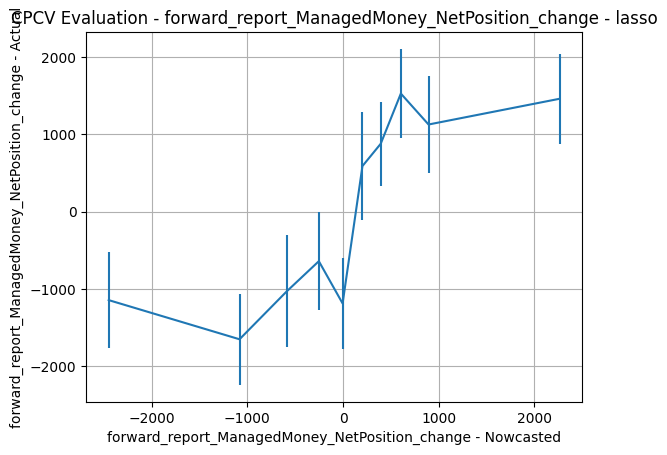

ridge: score=0.1285, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
{'alpha': 4.473429410462694e-05}


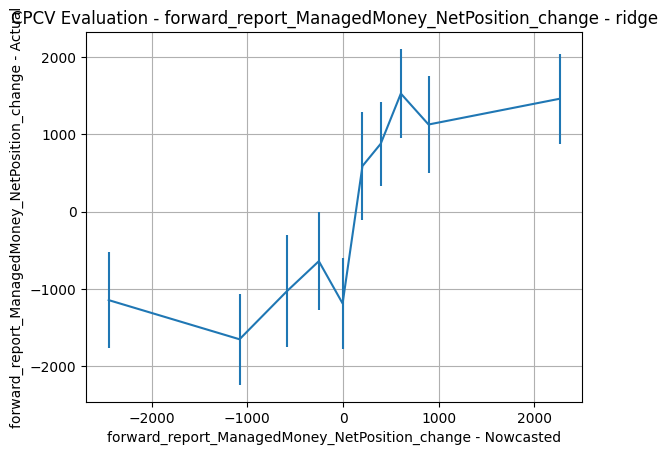

rf: score=0.1685, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 7, 'min_samples_leaf': 6, 'max_features': 'sqrt'}
{'n_estimators': 1000, 'max_depth': 7, 'min_samples_leaf': 6, 'max_features': 'sqrt'}


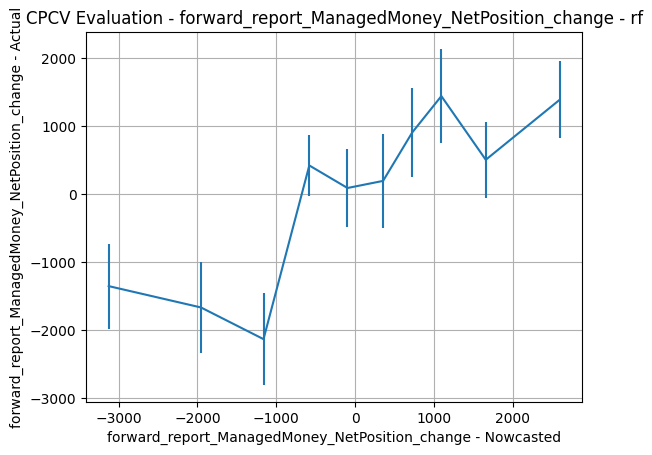

hgbm: score=0.1131, params={'model': 'hgbm', 'learning_rate': 0.25462593267006123, 'max_depth': 4, 'max_iter': 500, 'l2_regularization': 0.12660573808175046, 'max_leaf_nodes': 185}
{'learning_rate': 0.25462593267006123, 'max_depth': 4, 'max_iter': 500, 'l2_regularization': 0.12660573808175046, 'max_leaf_nodes': 185}


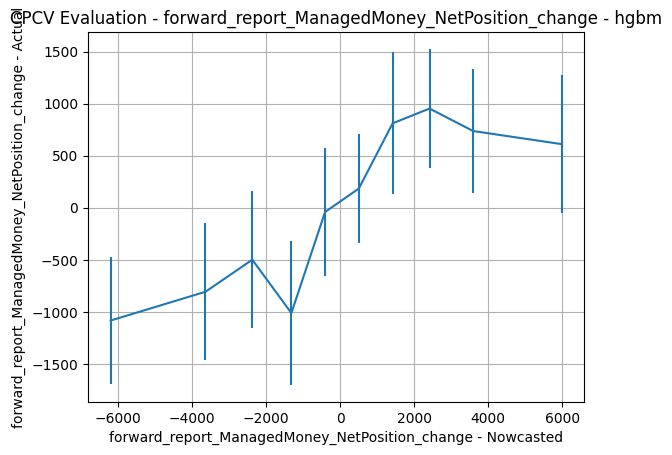

ols: score=0.1285, params={'model': 'ols'}
{}


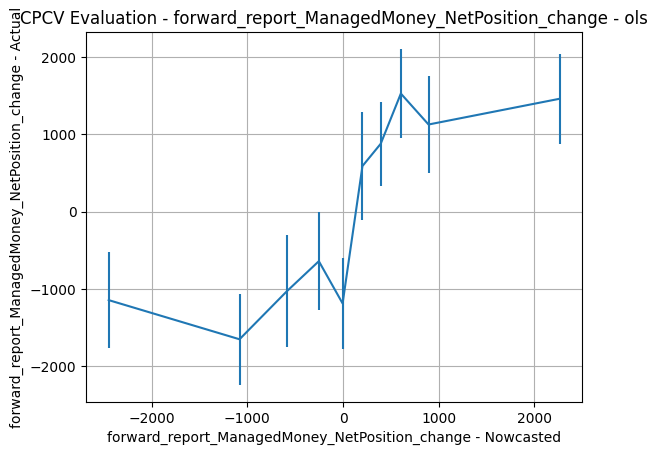

enet: score=0.0122, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


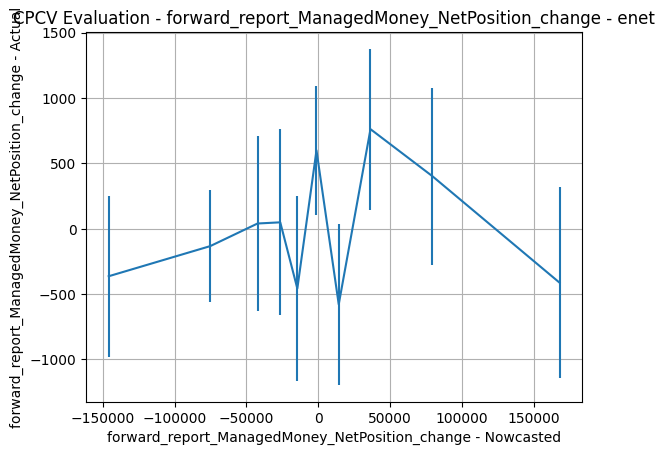

extra: score=0.1323, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}


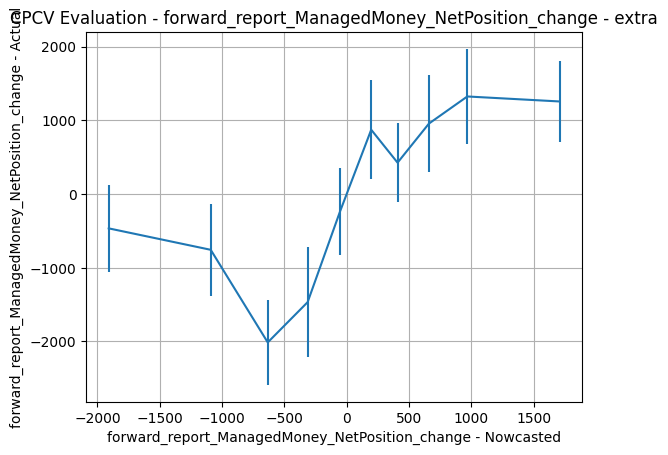

forward_report_ManagedMoney_LongPosition_change
lasso: score=0.1914, params={'model': 'lasso', 'alpha': 9.714586134002047}
{'alpha': 9.714586134002047}


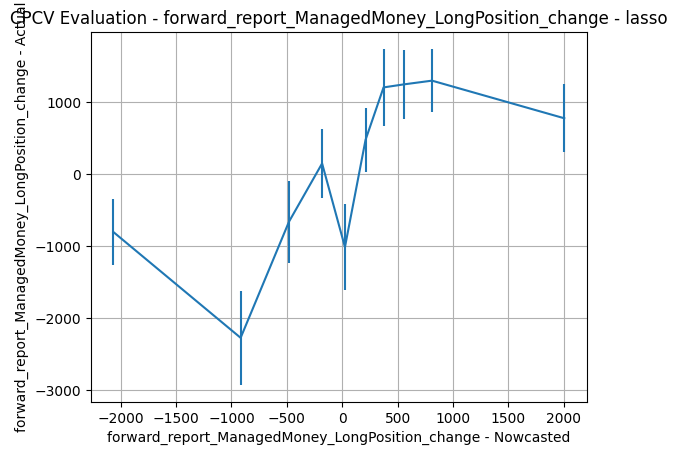

ridge: score=0.1920, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
{'alpha': 4.473429410462694e-05}


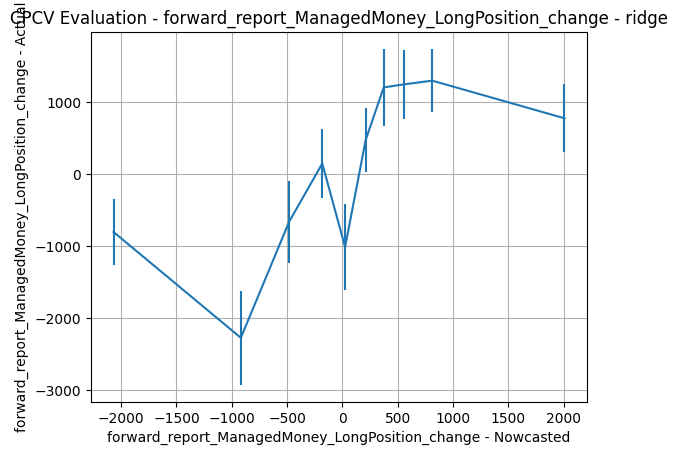

rf: score=0.1980, params={'model': 'rf', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 7, 'max_features': 'log2'}
{'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 7, 'max_features': 'log2'}


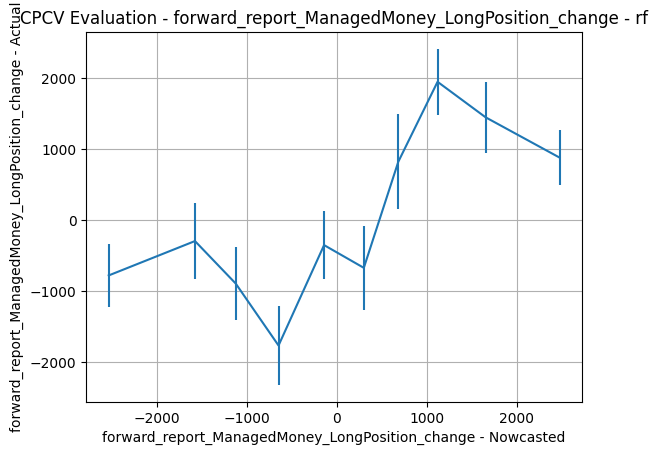

hgbm: score=0.1033, params={'model': 'hgbm', 'learning_rate': 0.25462593267006123, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.12660573808175046, 'max_leaf_nodes': 185}
{'learning_rate': 0.25462593267006123, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.12660573808175046, 'max_leaf_nodes': 185}


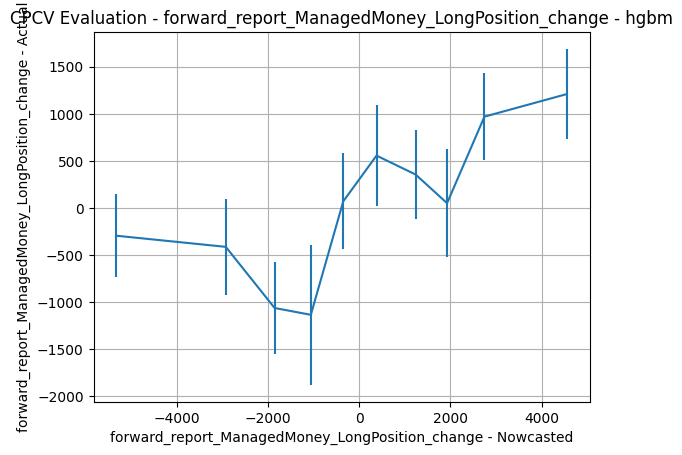

ols: score=0.1920, params={'model': 'ols'}
{}


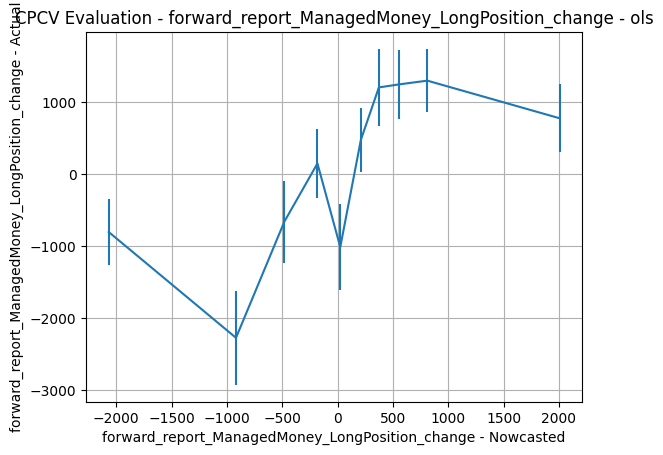

enet: score=0.0825, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


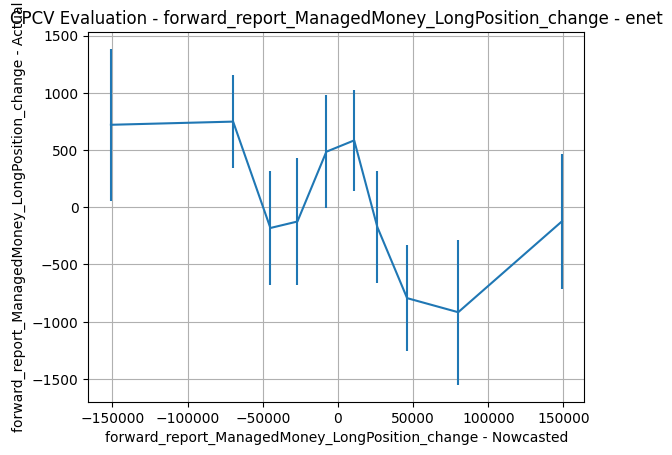

extra: score=0.1768, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}


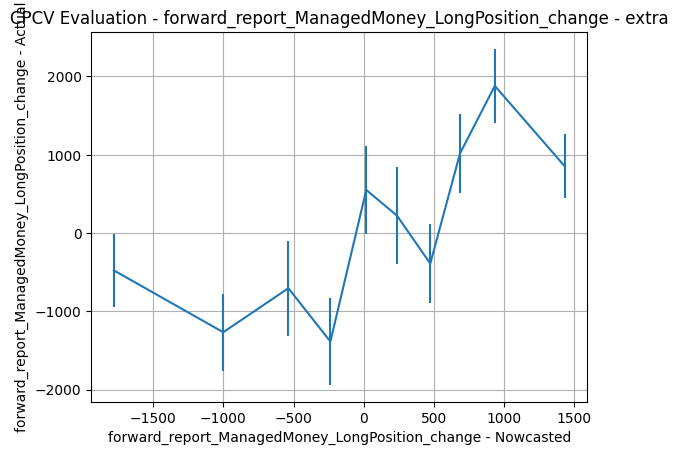

forward_report_ManagedMoney_ShortPosition_change
lasso: score=-0.0147, params={'model': 'lasso', 'alpha': 9.714586134002047}
{'alpha': 9.714586134002047}


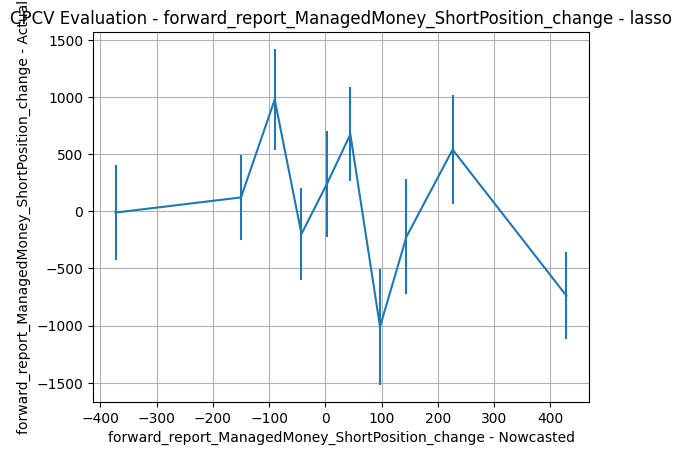

ridge: score=-0.0152, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


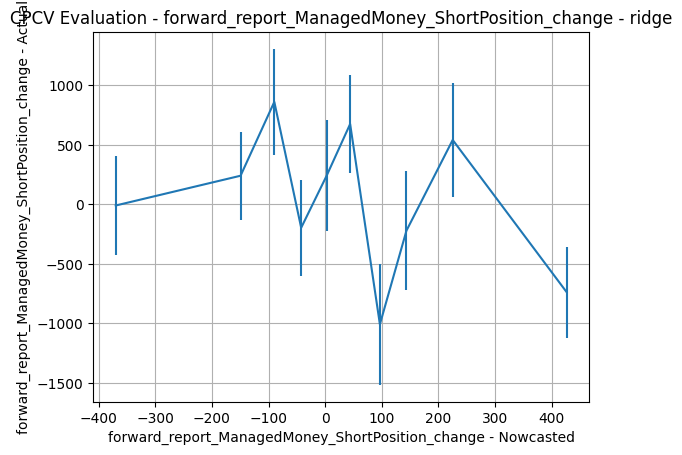

rf: score=0.1599, params={'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}
{'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}


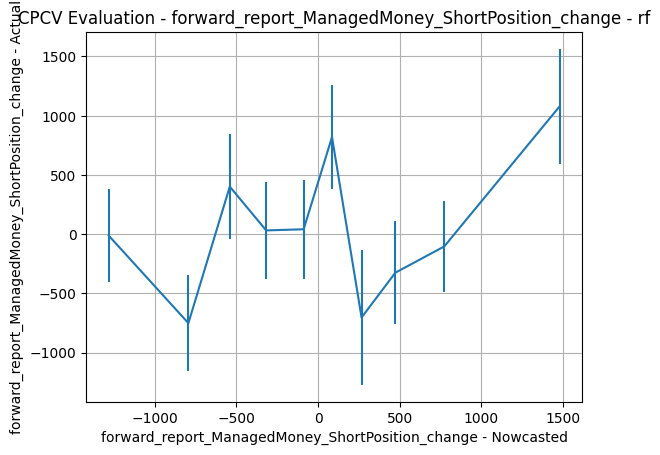

hgbm: score=0.1218, params={'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}
{'learning_rate': 0.002743023307727101, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}


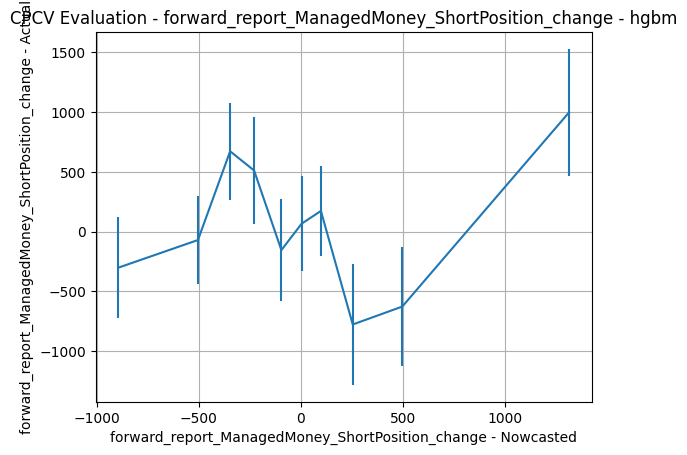

ols: score=-0.0137, params={'model': 'ols'}
{}


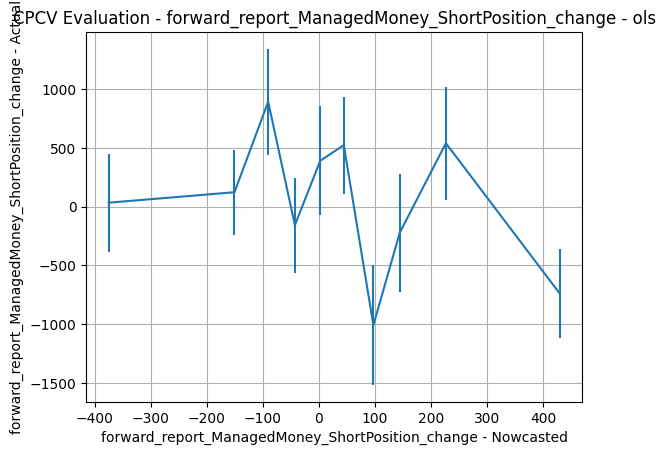

enet: score=-0.0172, params={'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}
{'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}


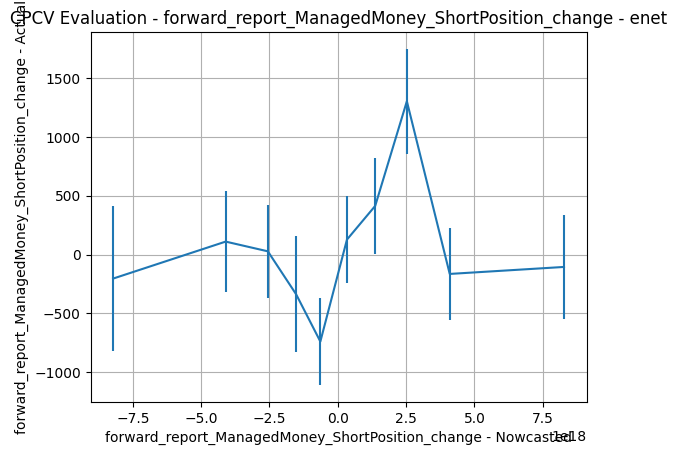

extra: score=0.1186, params={'model': 'extra', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
{'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 5, 'max_features': 'sqrt'}


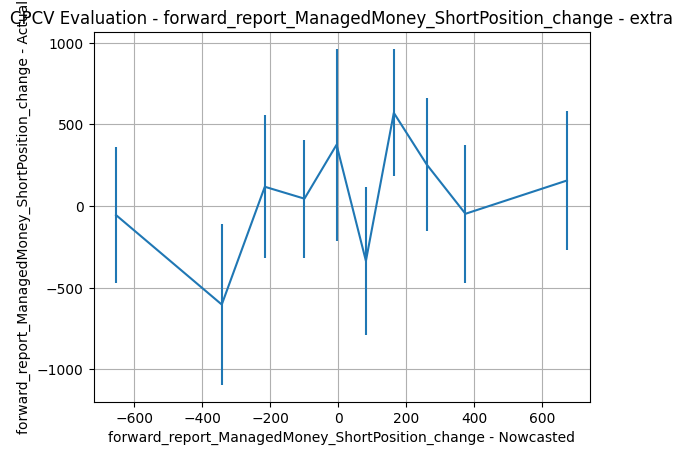

forward_ManagedMoney_NetPosition_to_openinterest_change
lasso: score=-0.0585, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


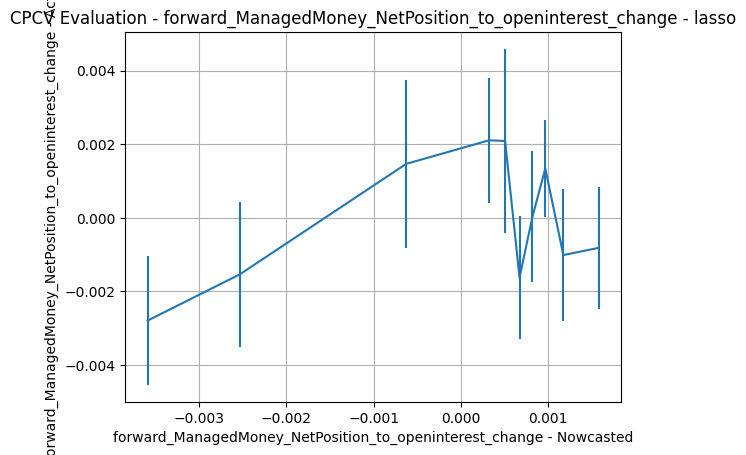

ridge: score=0.1607, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
{'alpha': 4.473429410462694e-05}


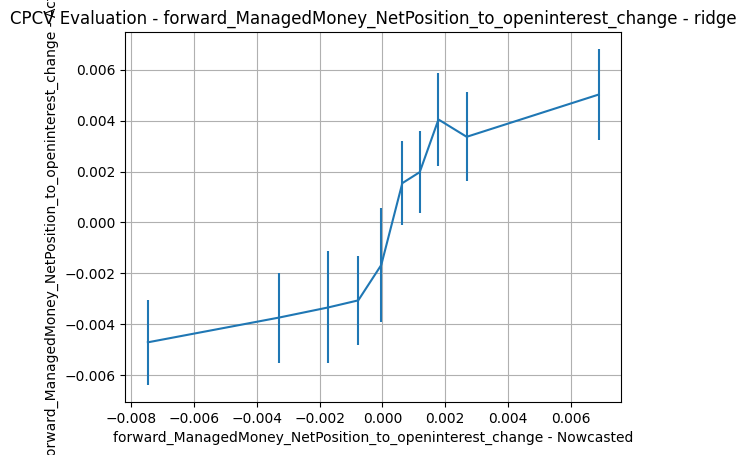

rf: score=0.1845, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 1, 'max_features': 'log2'}


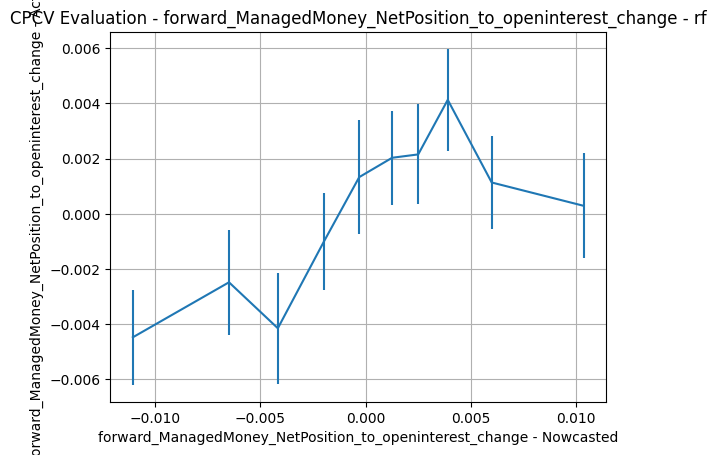

hgbm: score=0.1841, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}
{'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}


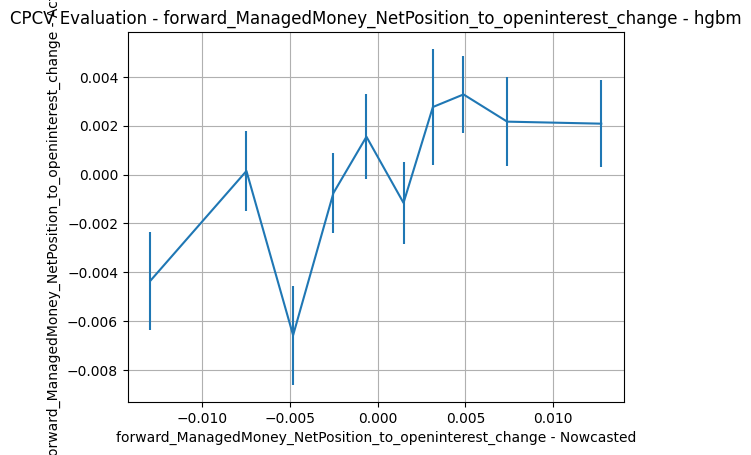

ols: score=0.1607, params={'model': 'ols'}
{}


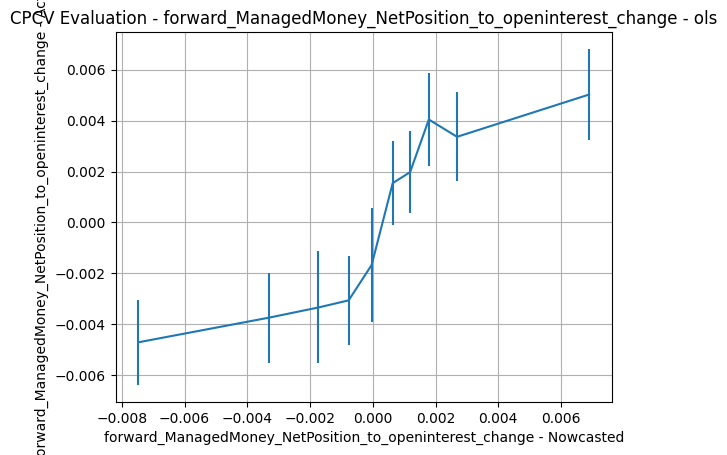

enet: score=-0.0535, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


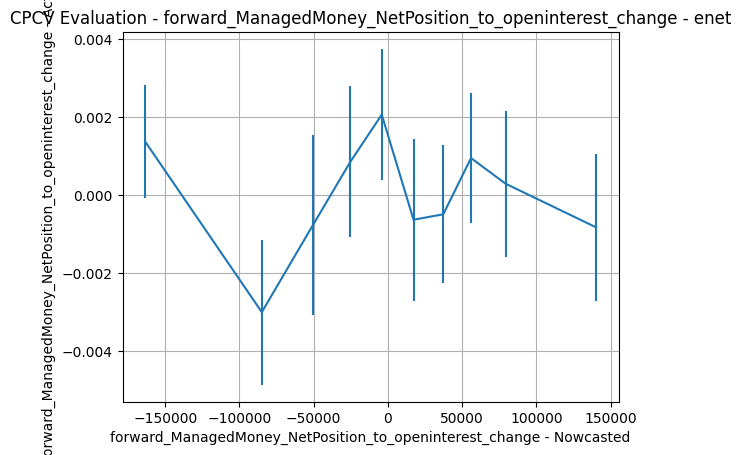

extra: score=0.1607, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt'}


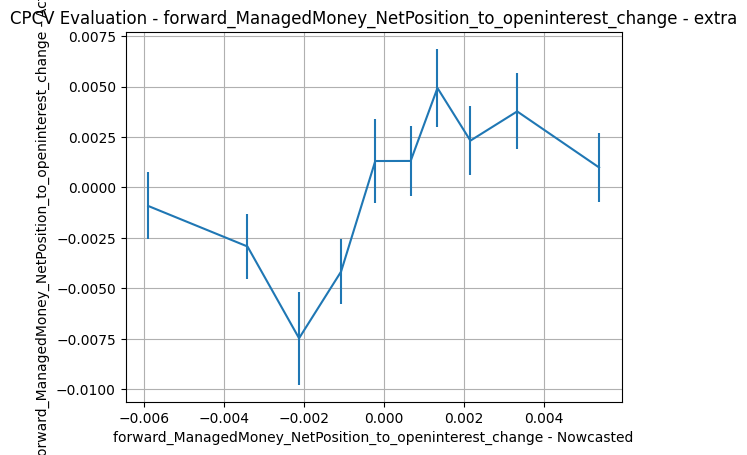

forward_ManagedMoney_LongPosition_to_openinterest_change
lasso: score=-0.0420, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


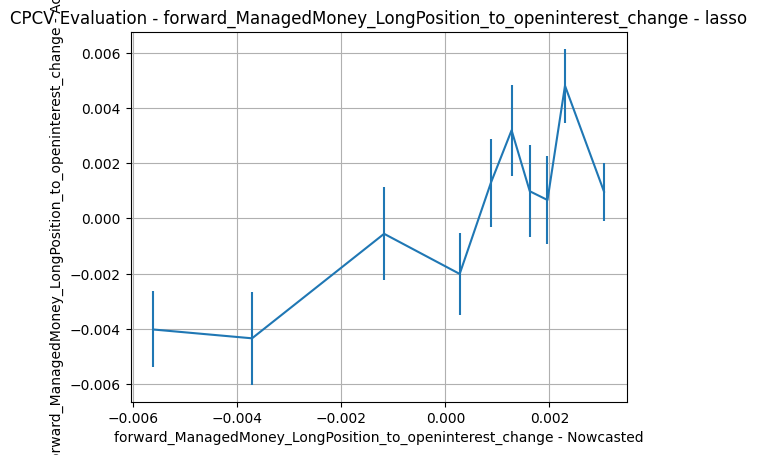

ridge: score=0.2150, params={'model': 'ridge', 'alpha': 442.5093801422389}
{'alpha': 442.5093801422389}


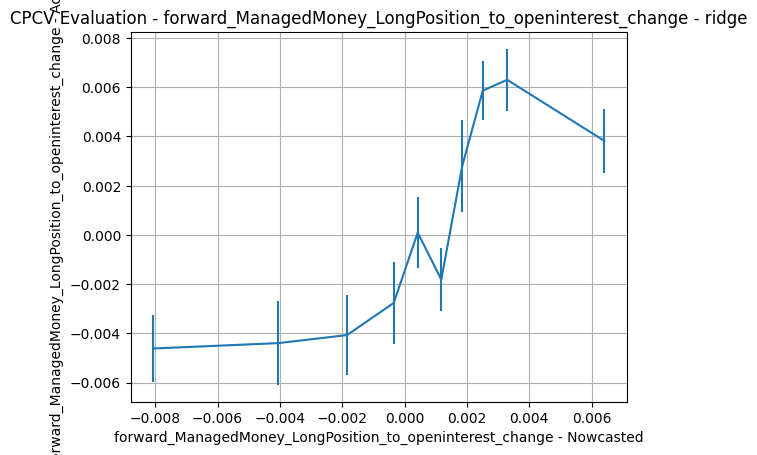

rf: score=0.2668, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 11, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 200, 'max_depth': 11, 'min_samples_leaf': 1, 'max_features': 'log2'}


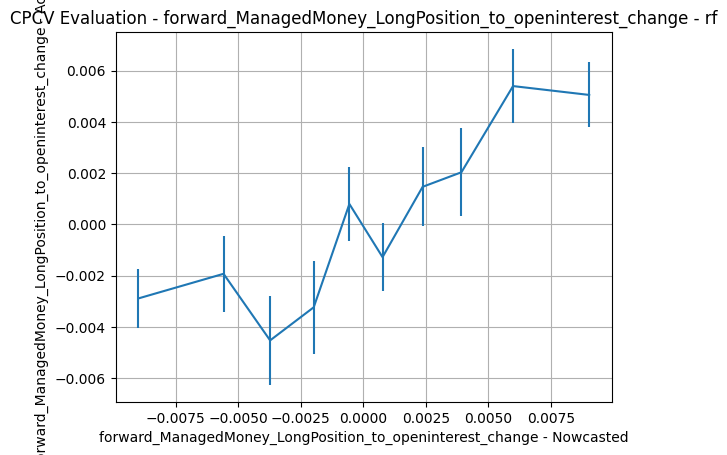

hgbm: score=0.2420, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}
{'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}


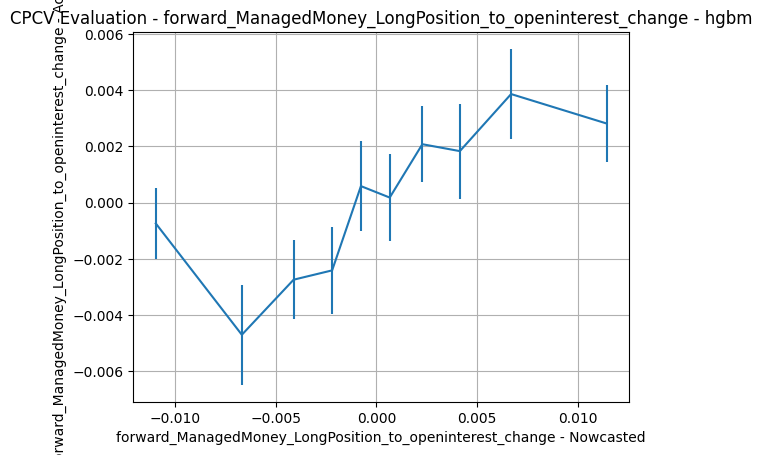

ols: score=0.2433, params={'model': 'ols'}
{}


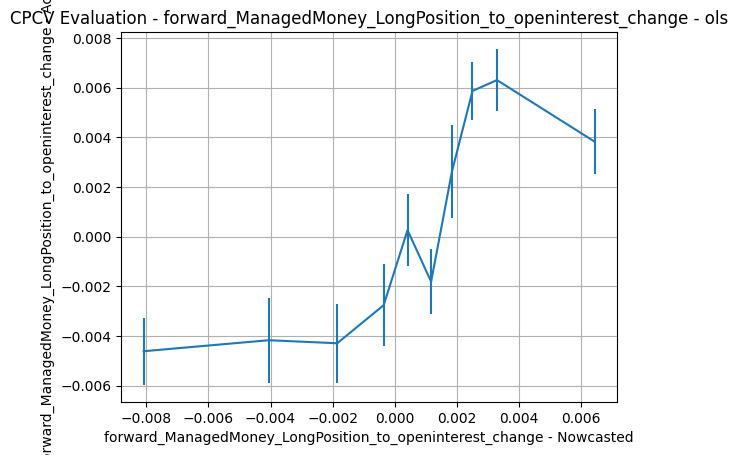

enet: score=-0.0422, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


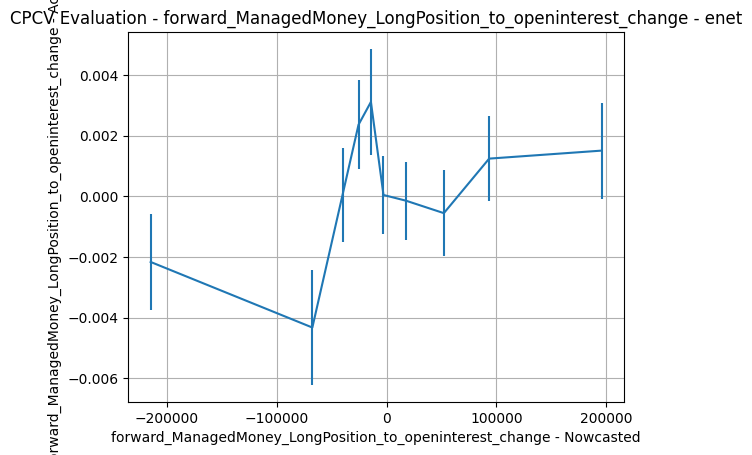

extra: score=0.2320, params={'model': 'extra', 'n_estimators': 600, 'max_depth': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
{'n_estimators': 600, 'max_depth': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt'}


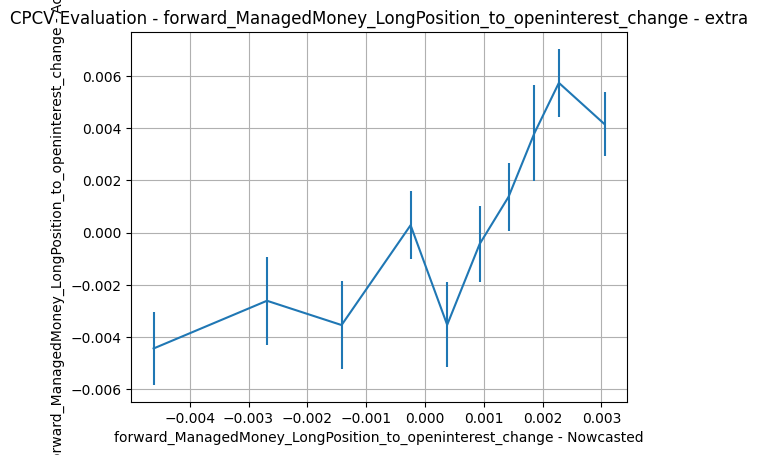

forward_ManagedMoney_ShortPosition_to_openinterest_change
lasso: score=-0.0470, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


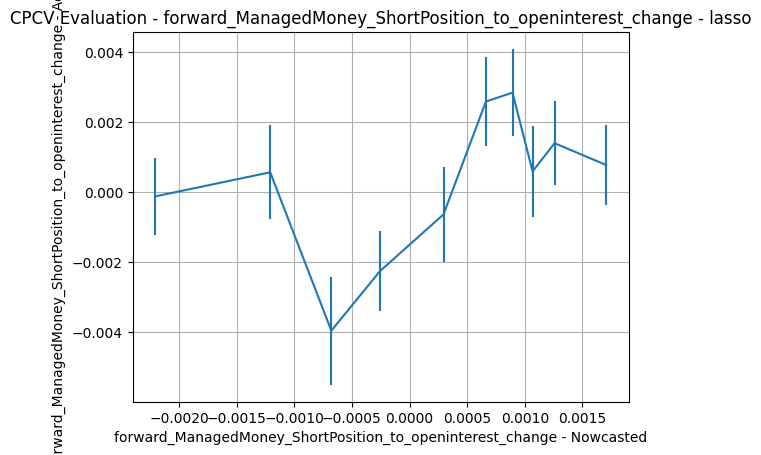

ridge: score=0.0702, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
{'alpha': 4.473429410462694e-05}


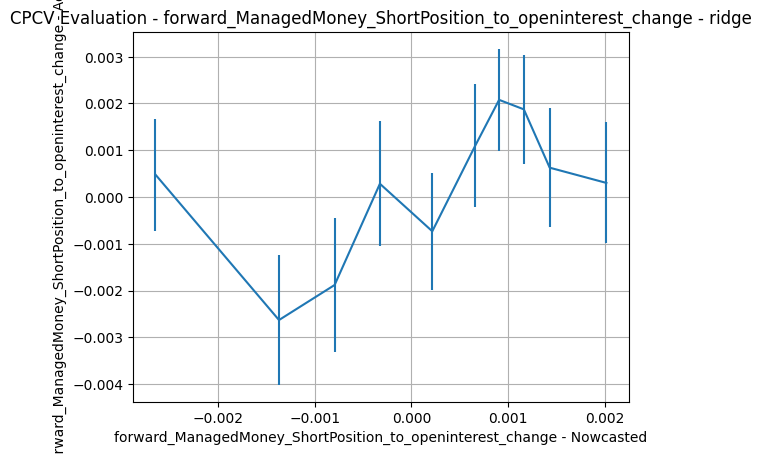

rf: score=0.1135, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 1, 'max_features': 'log2'}


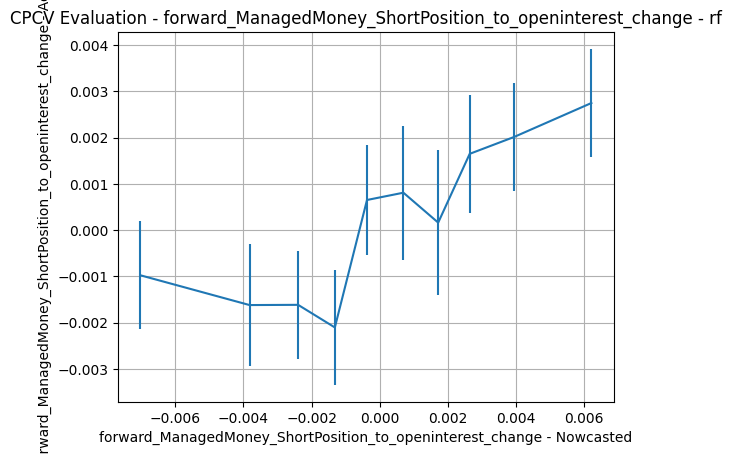

hgbm: score=0.0723, params={'model': 'hgbm', 'learning_rate': 0.2950581131879257, 'max_depth': 4, 'max_iter': 800, 'l2_regularization': 0.5380650305554875, 'max_leaf_nodes': 140}
{'learning_rate': 0.2950581131879257, 'max_depth': 4, 'max_iter': 800, 'l2_regularization': 0.5380650305554875, 'max_leaf_nodes': 140}


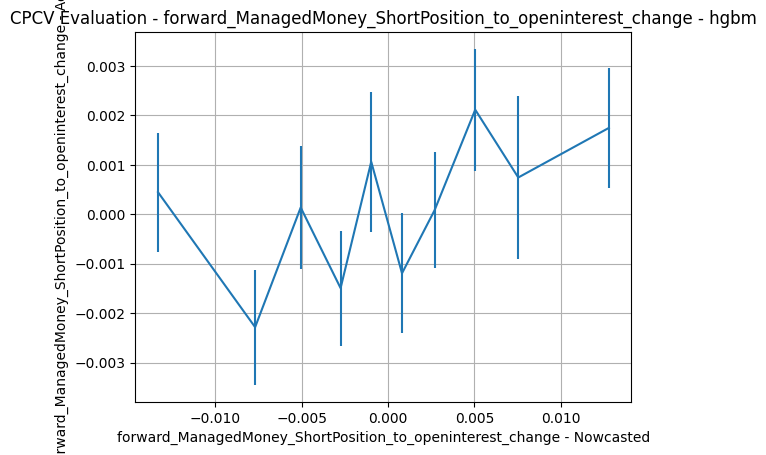

ols: score=0.0702, params={'model': 'ols'}
{}


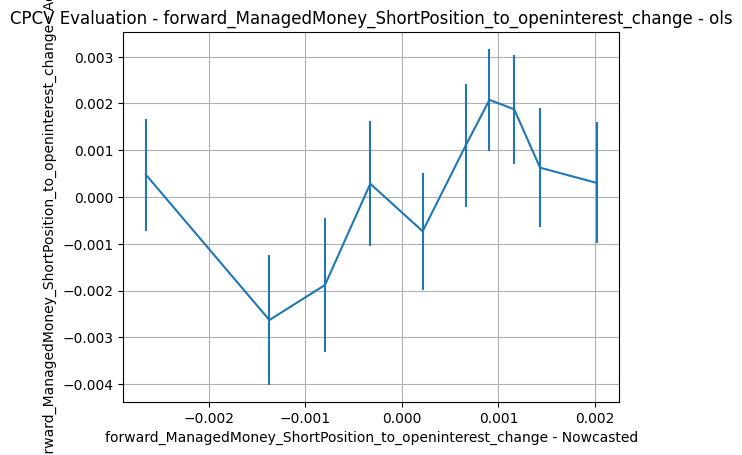

enet: score=-0.0372, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


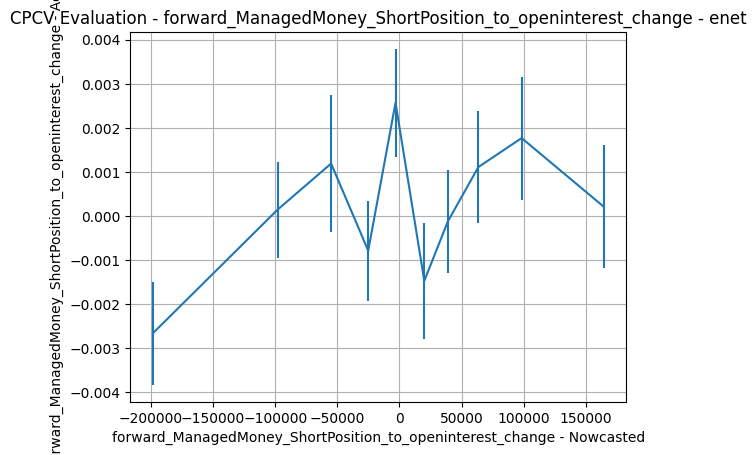

extra: score=0.0895, params={'model': 'extra', 'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


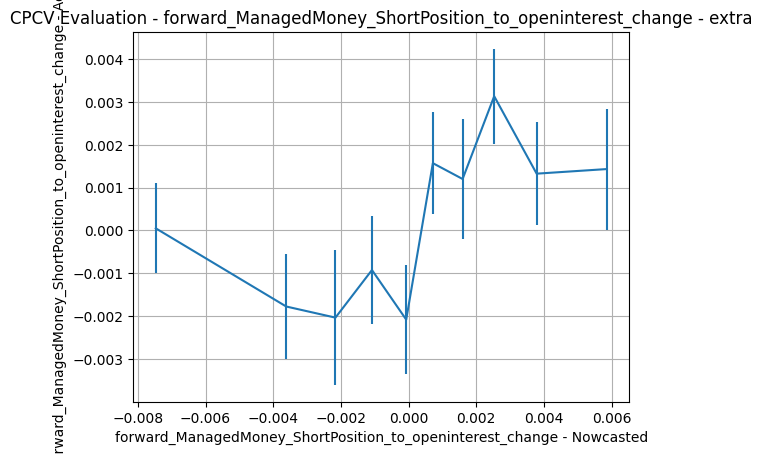

In [36]:
response_performance_map = {}
for response_name , best_model in responses_best_model.items():
    print(response_name)
    best_per_model = responses_best_per_model[response_name]
    response_performance_trail = {}
    for model_name, info in best_per_model.items():
        print(f"{model_name}: score={info['score']:.4f}, params={info['params']}")
        params = copy.deepcopy(info['params'])
        del params['model']
        print(params)
        # estimator = estimators_[model_name.lower()](**params) 

        if model_name == "enet": 
            estimator = SGDRegressor(**params)
        elif model_name == "lasso": 
            estimator = Lasso(**params)
        elif model_name == "ols": 
            estimator = LinearRegression()
        elif model_name == "ridge": 
            estimator = Ridge(**params)
        elif  model_name == "rf": 
            estimator = RandomForestRegressor(**params)
        elif model_name == "extra":
            estimator = ExtraTreesRegressor(**params)
        elif model_name == "hgbm":
            estimator = HistGradientBoostingRegressor(**params)
        

        Xy = dataset[['tradeDate']+feature_names+[response_name]].dropna()
        Xy.reset_index(drop=True, inplace= True)
        yhat = cpcv_predict( estimator ,
                             Xy[feature_names],
                             Xy[response_name],
                             cv=cv,
                                method = 'predict',
                                n_jobs=10)
        response_performance_trail[model_name] = np.corrcoef(yhat,  Xy[response_name])[0,1]
        _=plot_bin_summary_of_xy(
                    x = yhat,
                    y = Xy[response_name],
                    k= 10 )
        plt.xlabel(f'{response_name} - Nowcasted')
        plt.ylabel(f'{response_name} - Actual')
        plt.grid()
        plt.title(f'CPCV Evaluation - {response_name} - {model_name}')
        plt.show()
        plt.close()
    response_performance_map[response_name] = response_performance_trail
        
        

In [37]:
pd.DataFrame(response_performance_map).T

,lasso,ridge,rf,hgbm,ols,enet,extra
forward_report_ManagedMoney_NetPosition_change,0.119595,0.119595,0.175197,0.121838,0.119595,-0.016560,0.136677
forward_report_ManagedMoney_LongPosition_change,0.111120,0.111133,0.165285,0.106385,0.111133,-0.065192,0.154108
forward_report_ManagedMoney_ShortPosition_change,-0.031966,-0.032360,0.050428,0.021543,-0.031658,0.028705,0.023156
forward_ManagedMoney_NetPosition_to_openinterest_change,0.057469,0.130715,0.117341,0.129824,0.130715,-0.008228,0.130891
forward_ManagedMoney_LongPosition_to_openinterest_change,0.165795,0.189516,0.207026,0.160138,0.189192,0.079566,0.220296
forward_ManagedMoney_ShortPosition_to_openinterest_change,0.066813,0.070197,0.116756,0.072280,0.070197,0.048735,0.088193


In [38]:
final_selected_model_per_response = dict(pd.DataFrame(response_performance_map).T.idxmax(axis=1))

In [39]:
final_selected_model_and_parameters_per_response = {}
for response_name , best_model_params in responses_best_per_model.items():
    print(response_name)
    best_model_name = final_selected_model_per_response[response_name]
    best_model_params = copy.deepcopy(best_model_params[best_model_name]['params'])
    del best_model_params['model']
    print(best_model_params)
    final_selected_model_and_parameters_per_response[response_name] = {
'model_name' : best_model_name, 
    'params': best_model_params
        
    }
    

forward_report_ManagedMoney_NetPosition_change
{'n_estimators': 1000, 'max_depth': 7, 'min_samples_leaf': 6, 'max_features': 'sqrt'}
forward_report_ManagedMoney_LongPosition_change
{'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 7, 'max_features': 'log2'}
forward_report_ManagedMoney_ShortPosition_change
{'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}
forward_ManagedMoney_NetPosition_to_openinterest_change
{'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
forward_ManagedMoney_LongPosition_to_openinterest_change
{'n_estimators': 600, 'max_depth': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
forward_ManagedMoney_ShortPosition_to_openinterest_change
{'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 1, 'max_features': 'log2'}


In [40]:
final_selected_model_and_parameters_per_response

{'forward_report_ManagedMoney_NetPosition_change': {'model_name': 'rf',
  'params': {'n_estimators': 1000,
   'max_depth': 7,
   'min_samples_leaf': 6,
   'max_features': 'sqrt'}},
 'forward_report_ManagedMoney_LongPosition_change': {'model_name': 'rf',
  'params': {'n_estimators': 1200,
   'max_depth': 29,
   'min_samples_leaf': 7,
   'max_features': 'log2'}},
 'forward_report_ManagedMoney_ShortPosition_change': {'model_name': 'rf',
  'params': {'n_estimators': 1200,
   'max_depth': 22,
   'min_samples_leaf': 10,
   'max_features': 'log2'}},
 'forward_ManagedMoney_NetPosition_to_openinterest_change': {'model_name': 'extra',
  'params': {'n_estimators': 1200,
   'max_depth': 21,
   'min_samples_leaf': 3,
   'max_features': 'sqrt'}},
 'forward_ManagedMoney_LongPosition_to_openinterest_change': {'model_name': 'extra',
  'params': {'n_estimators': 600,
   'max_depth': 5,
   'min_samples_leaf': 4,
   'max_features': 'sqrt'}},
 'forward_ManagedMoney_ShortPosition_to_openinterest_change': {'

In [41]:
import json
with open("ho_cot_mm_forecast_selected_model_by_response.json", "w") as f:
    json.dump(final_selected_model_and_parameters_per_response, f)